# **Classification on Bankruptcy**

In [1]:
### Importing Neccessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
data = pd.read_csv('Bankruptcy Prediction (1).csv')

In [4]:
data.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

### Data Exploration

In [5]:
#Finding No. of Rows and No. of Columns in dataset
data.shape

(6819, 96)

In [6]:
data.info() #no null values and all features are numeric datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [7]:
#Statistics measure on numerical data
data.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

Duplicated Values

In [8]:
data.duplicated().sum() #No duplicated data present

0

In [9]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [14]:
#Renaming the Column Names
data.columns =[
                    'Bankrupt', 'ROA(C)_before_interest_and_depreciation_before_interest',
                    'ROA(A)_before_interest_and_%_after_tax',
                    'ROA(B)_before_interest_and_depreciation_after_tax',
                    'Operating_Gross_Margin', 'Realized_Sales_Gross_Margin',
                    'Operating_Profit_Rate', 'Pre_tax_net_Interest_Rate',
                    'After_tax_net_Interest_Rate',
                    'Non_industry_income_and_expenditure/revenue',
                    'Continuous_interest_rate_(after_tax)', 'Operating_Expense_Rate',
                    'Research_and_development_expense_rate', 'Cash_flow_rate',
                    'Interest_bearing_debt_interest_rate', 'Tax_rate_(A)',
                    'Net_Value_Per_Share_(B)', 'Net_Value_Per_Share_(A)',
                    'Net_Value_Per_Share_(C)', 'Persistent_EPS_in_the_Last_Four_Seasons',
                    'Cash_Flow_Per_Share', 'Revenue_Per_Share_(Yuan_¥)',
                    'Operating_Profit_Per_Share_(Yuan_¥)',
                    'Per_Share_Net_profit_before_tax_(Yuan_¥)',
                    'Realized_Sales_Gross_Profit_Growth_Rate',
                    'Operating_Profit_Growth_Rate', 'After_tax_Net_Profit_Growth_Rate',
                    'Regular_Net_Profit_Growth_Rate', 'Continuous_Net_Profit_Growth_Rate',
                    'Total_Asset_Growth_Rate', 'Net_Value_Growth_Rate',
                    'Total_Asset_Return_Growth_Rate_Ratio', 'Cash_Reinvestment_%',
                    'Current_Ratio', 'Quick_Ratio', 'Interest_Expense_Ratio',
                    'Total_debt/Total_net_worth', 'Debt_ratio_%', 'Net_worth/Assets',
                    'Long_term_fund_suitability_ratio_(A)', 'Borrowing_dependency',
                    'Contingent_liabilities/Net_worth',
                    'Operating_profit/Paid_in_capital',
                    'Net_profit_before_tax/Paid_in_capital',
                    'Inventory_and_accounts_receivable/Net_value', 'Total_Asset_Turnover',
                    'Accounts_Receivable_Turnover', 'Average_Collection_Days',
                    'Inventory_Turnover_Rate_(times)', 'Fixed_Assets_Turnover_Frequency',
                    'Net_Worth_Turnover_Rate_(times)', 'Revenue_per_person',
                    'Operating_profit_per_person', 'Allocation_rate_per_person',
                    'Working_Capital_to_Total_Assets', 'Quick_Assets/Total_Assets',
                    'Current_Assets/Total_Assets', 'Cash/Total_Assets',
                    'Quick_Assets/Current_Liability', 'Cash/Current_Liability',
                    'Current_Liability_to_Assets', 'Operating_Funds_to_Liability',
                    'Inventory/Working_Capital', 'Inventory/Current_Liability',
                    'Current_Liabilities/Liability', 'Working_Capital/Equity',
                    'Current_Liabilities/Equity', 'Long_term_Liability_to_Current_Assets',
                    'Retained_Earnings_to_Total_Assets', 'Total_income/Total_expense',
                    'Total_expense/Assets', 'Current_Asset_Turnover_Rate',
                    'Quick_Asset_Turnover_Rate', 'Working_capital_Turnover_Rate',
                    'Cash_Turnover_Rate', 'Cash_Flow_to_Sales', 'Fixed_Assets_to_Assets',
                    'Current_Liability_to_Liability', 'Current_Liability_to_Equity',
                    'Equity_to_Long_term_Liability', 'Cash_Flow_to_Total_Assets',
                    'Cash_Flow_to_Liability', 'CFO_to_Assets', 'Cash_Flow_to_Equity',
                    'Current_Liability_to_Current_Assets', 'Liability_Assets_Flag',
                    'Net_Income_to_Total_Assets', 'Total_assets_to_GNP_price',
                    'No_credit_Interval', 'Gross_Profit_to_Sales',
                    'Net_Income_to_Stockholders_Equity', 'Liability_to_Equity',
                    'Degree_of_Financial_Leverage_(DFL)',
                    'Interest_Coverage_Ratio_(Interest_expense_to_EBIT)',
                    'Net_Income_Flag', 'Equity_to_Liability'


                ]


ValueError: Length mismatch: Expected axis has 95 elements, new values have 96 elements

In [11]:
data.columns

Index(['Bankrupt', 'ROA(C)_before_interest_and_depreciation_before_interest',
       'ROA(A)_before_interest_and_%_after_tax',
       'ROA(B)_before_interest_and_depreciation_after_tax',
       'Operating_Gross_Margin', 'Realized_Sales_Gross_Margin',
       'Operating_Profit_Rate', 'Pre_tax_net_Interest_Rate',
       'After_tax_net_Interest_Rate',
       'Non_industry_income_and_expenditure/revenue',
       'Continuous_interest_rate_(after_tax)', 'Operating_Expense_Rate',
       'Research_and_development_expense_rate', 'Cash_flow_rate',
       'Interest_bearing_debt_interest_rate', 'Tax_rate_(A)',
       'Net_Value_Per_Share_(B)', 'Net_Value_Per_Share_(A)',
       'Net_Value_Per_Share_(C)', 'Persistent_EPS_in_the_Last_Four_Seasons',
       'Cash_Flow_Per_Share', 'Revenue_Per_Share_(Yuan_¥)',
       'Operating_Profit_Per_Share_(Yuan_¥)',
       'Per_Share_Net_profit_before_tax_(Yuan_¥)',
       'Realized_Sales_Gross_Profit_Growth_Rate',
       'Operating_Profit_Growth_Rate', 'After_tax_

In [12]:
# # Removing the columns with zero variance---"Net Income Flag"
data.drop(data.columns[data.nunique() == 1][0],axis=1,inplace=True)

In [13]:
data.shape

(6819, 95)

### Exploratory Data Analysis

In [15]:
data.head()

Bankrupt  ROA(C)_before_interest_and_depreciation_before_interest  \
0         1                                           0.370594         
1         1                                           0.464291         
2         1                                           0.426071         
3         1                                           0.399844         
4         1                                           0.465022         

   ROA(A)_before_interest_and_%_after_tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   ROA(B)_before_interest_and_depreciation_after_tax  Operating_Gross_Margin  \
0                                           0.405750                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                           0.457733                0.583541   
4                                           0.522298                0.598783   

   Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998700   
4                     0.598783               0.998973   

   Pre_tax_net_Interest_Rate  After_tax_net_Interest_Rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   Non_industry_income_and_expenditure/revenue  ...  Liability_Assets_Flag  \
0                                     0.302646  ...                      0   
1                                     0.303556  ...                      0   
2                                     0.302035  ...                      0   
3                                     0.303350  ...                      0   
4                                     0.303475  ...                      0   

   Net_Income_to_Total_Assets  Total_assets_to_GNP_price  No_credit_Interval  \
0                    0.716845                   0.009219            0.622879   
1                    0.795297                   0.008323            0.623652   
2                    0.774670                   0.040003            0.623841   
3                    0.739555                   0.003252            0.622929   
4                    0.795016                   0.003878            0.623521   

   Gross_Profit_to_Sales  Net_Income_to_Stockholders_Equity  \
0               0.601453                           0.827890   
1               0.610237                           0.839969   
2               0.601449                           0.836774   
3               0.583538                           0.834697   
4               0.598782                           0.839973   

   Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
0             0.290202                            0.026601   
1             0.283846                            0.264577   
2             0.290189                            0.026555   
3             0.281721                            0.026697   
4             0.278514                            0.024752   

   Interest_Coverage_Ratio_(Interest_expense_to_EBIT)  Equity_to_Liability  
0                                           0.564050              0.016469  
1                                           0.570175              0.020794  
2                                           0.563706              0.016474  
3                                           0.564663              0.023982  
4                    

In [16]:
data["Liability_Assets_Flag"].value_counts()
#This feature likely indicates whether the total liabilities of a company exceed its total assets (1) or not (0).

Liability_Assets_Flag
0    6811
1       8
Name: count, dtype: int64

In [17]:
# Creating a cross-tabulation
cross_tab = pd.crosstab(data["Liability_Assets_Flag"], data['Bankrupt'])
cross_tab

Bankrupt                  0    1
Liability_Assets_Flag           
0                      6597  214
1                         2    6

# Visualizations

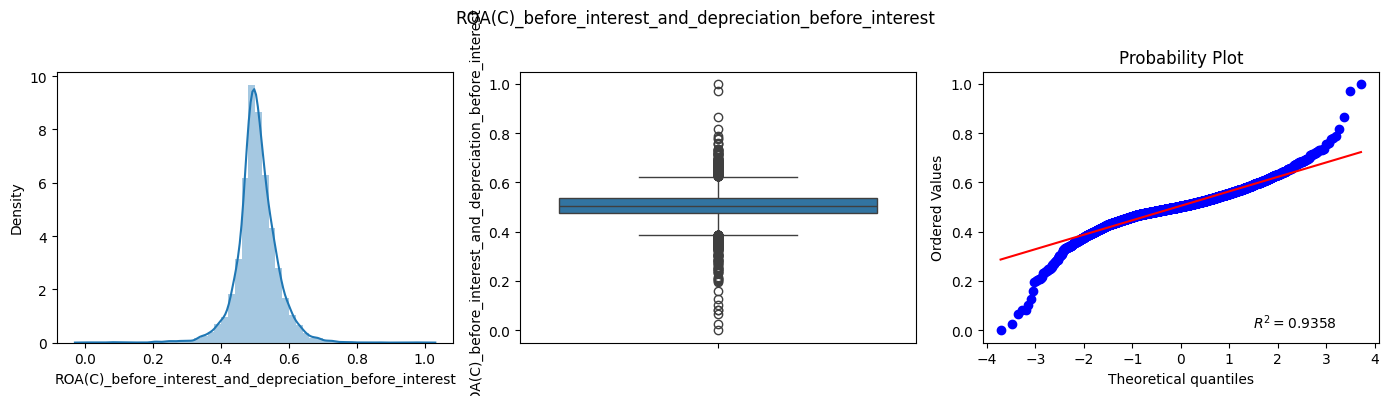

Skewness of ROA(C)_before_interest_and_depreciation_before_interest is : -0.3239410032376897
Kurtosis of ROA(C)_before_interest_and_depreciation_before_interest is : 6.390770201755304


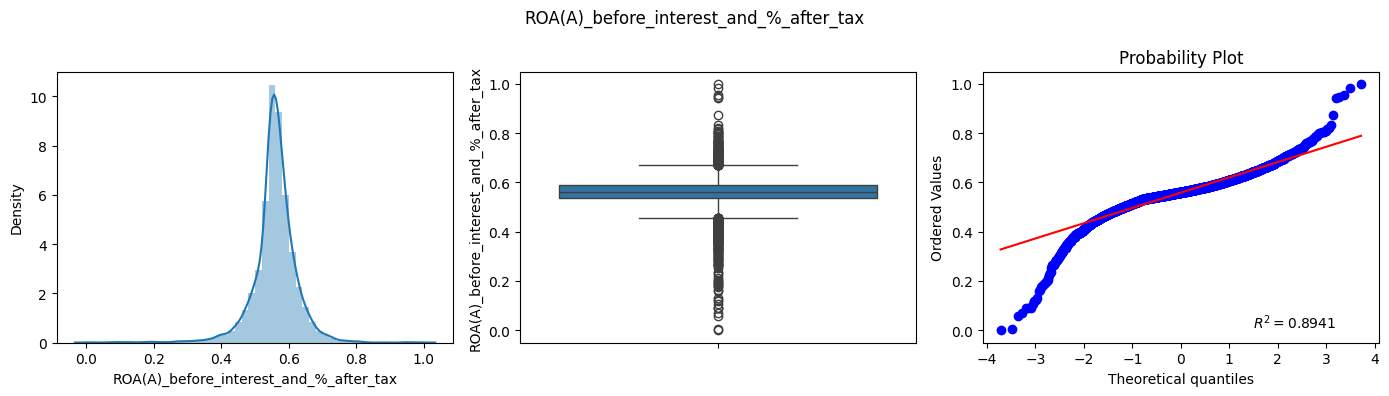

Skewness of ROA(A)_before_interest_and_%_after_tax is : -1.0337268374435982
Kurtosis of ROA(A)_before_interest_and_%_after_tax is : 9.03878483556222


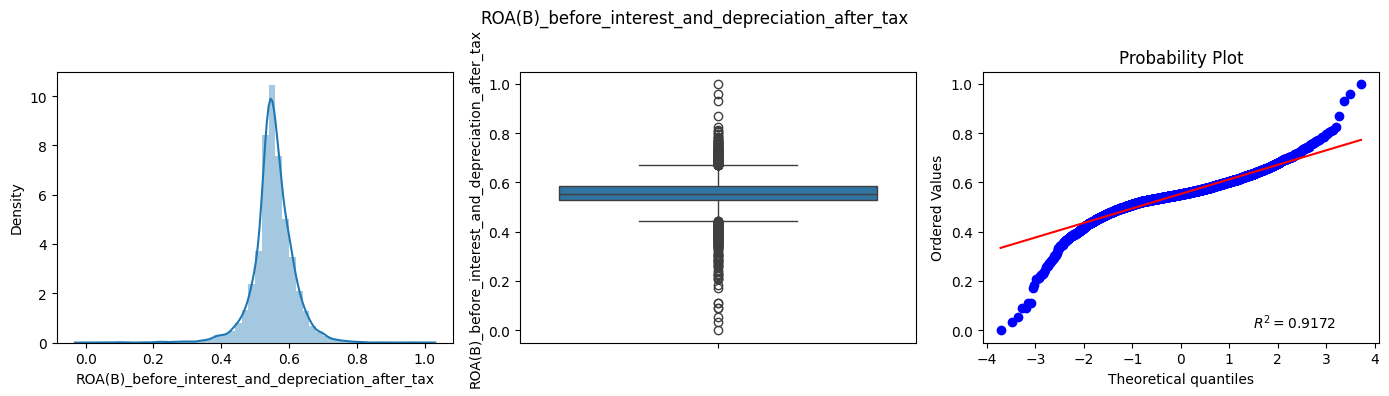

Skewness of ROA(B)_before_interest_and_depreciation_after_tax is : -0.7635637191791648
Kurtosis of ROA(B)_before_interest_and_depreciation_after_tax is : 7.929073721709035


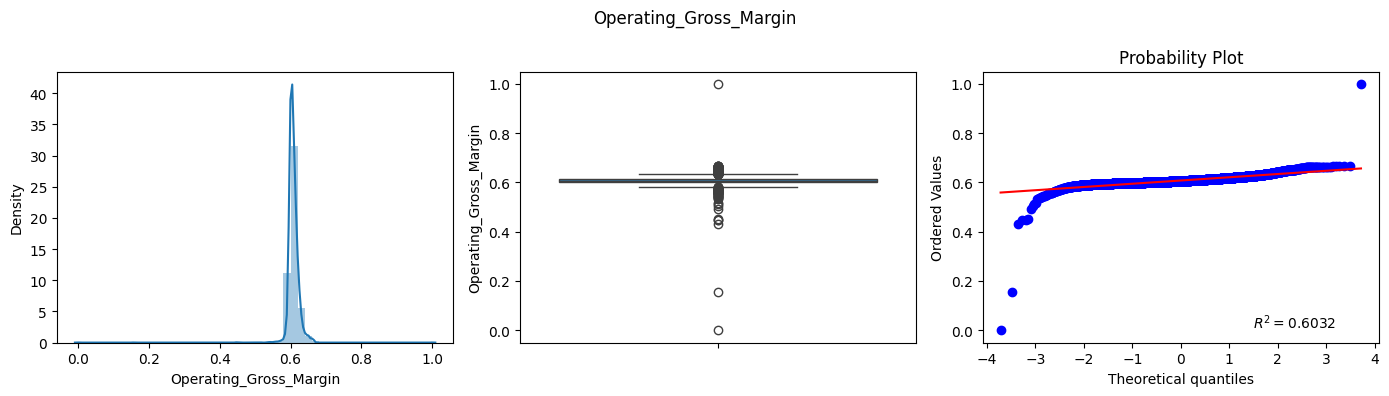

Skewness of Operating_Gross_Margin is : -8.043367962976834
Kurtosis of Operating_Gross_Margin is : 365.5406713618406


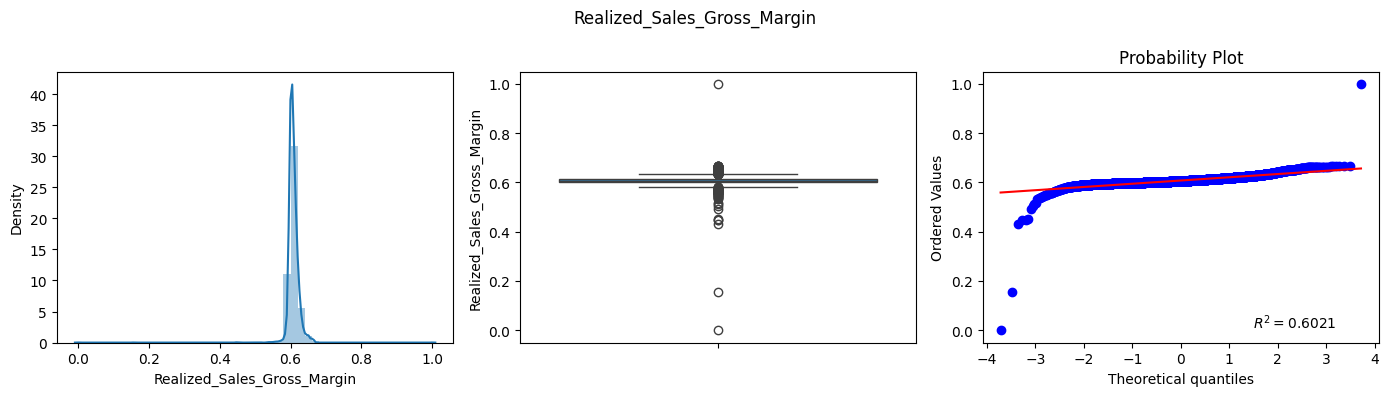

Skewness of Realized_Sales_Gross_Margin is : -8.066572143637043
Kurtosis of Realized_Sales_Gross_Margin is : 367.0418297144066


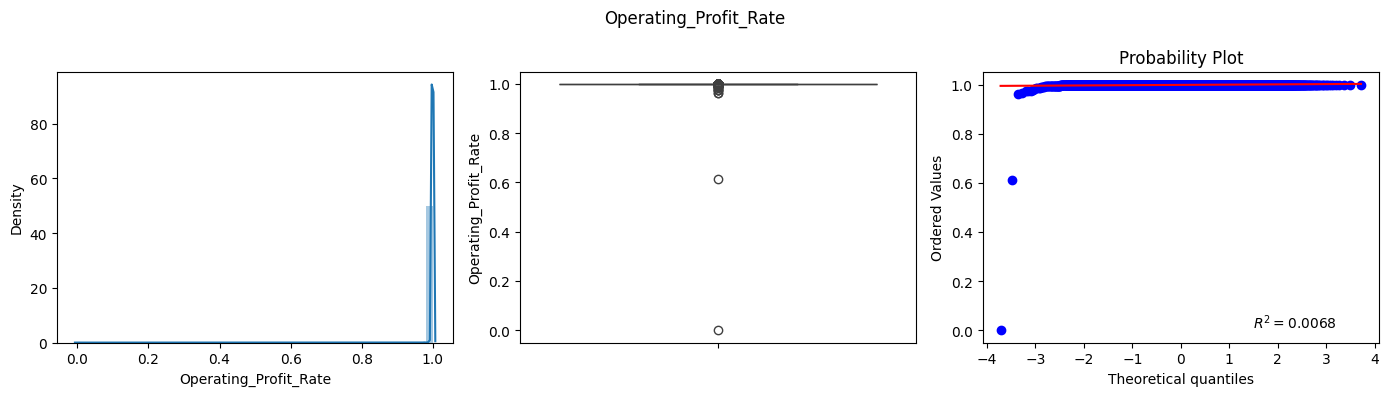

Skewness of Operating_Profit_Rate is : -70.23716436128285
Kurtosis of Operating_Profit_Rate is : 5210.086057434661


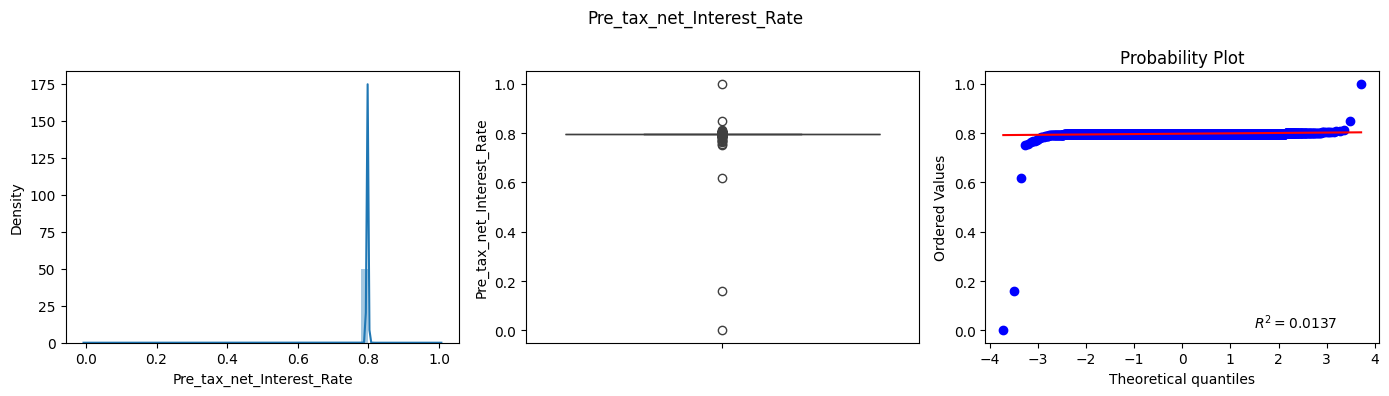

Skewness of Pre_tax_net_Interest_Rate is : -52.48286652280293
Kurtosis of Pre_tax_net_Interest_Rate is : 3053.033349419831


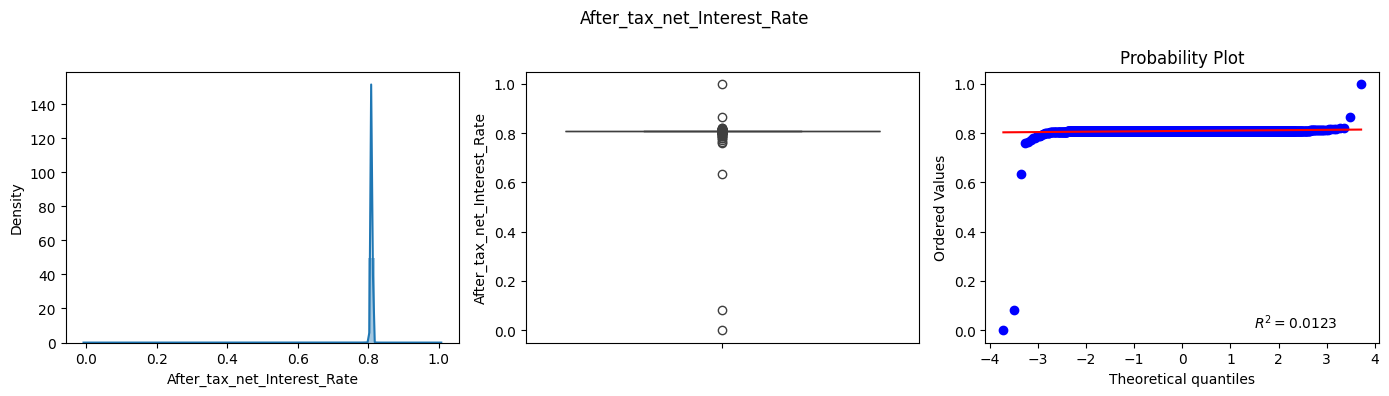

Skewness of After_tax_net_Interest_Rate is : -52.99574381463863
Kurtosis of After_tax_net_Interest_Rate is : 3029.1157905263353


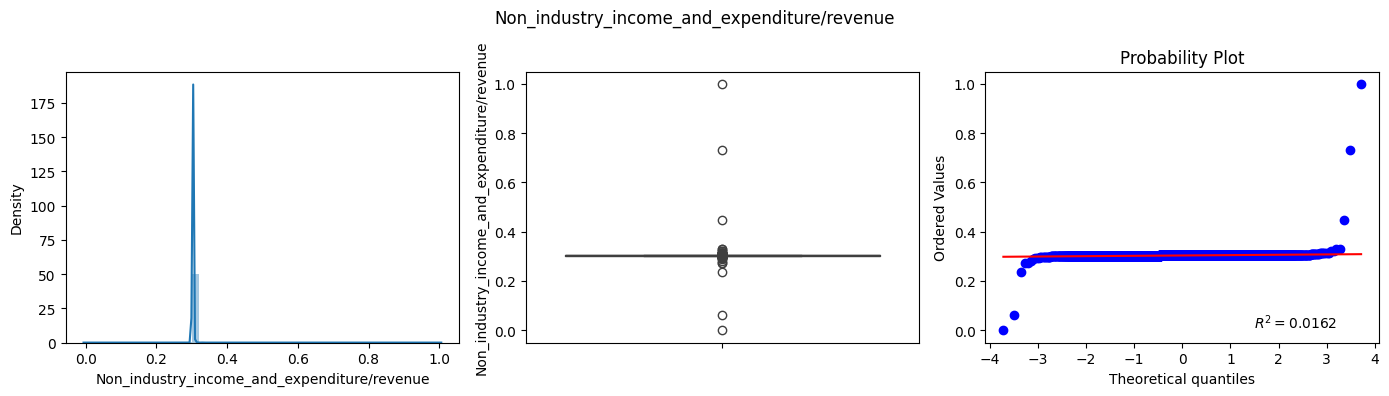

Skewness of Non_industry_income_and_expenditure/revenue is : 39.64168918755239
Kurtosis of Non_industry_income_and_expenditure/revenue is : 2649.428721536451


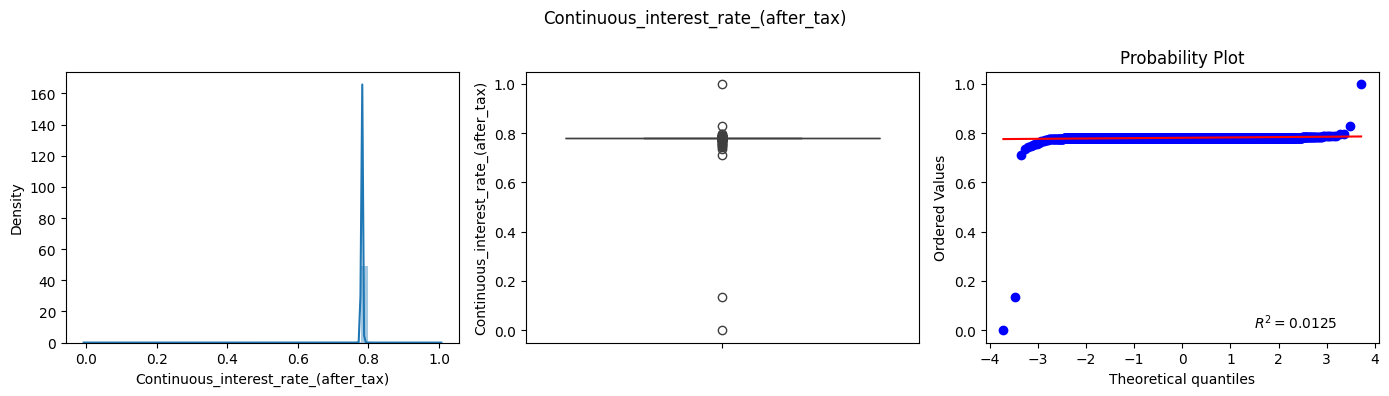

Skewness of Continuous_interest_rate_(after_tax) is : -53.200120791151186
Kurtosis of Continuous_interest_rate_(after_tax) is : 3128.7341772015984


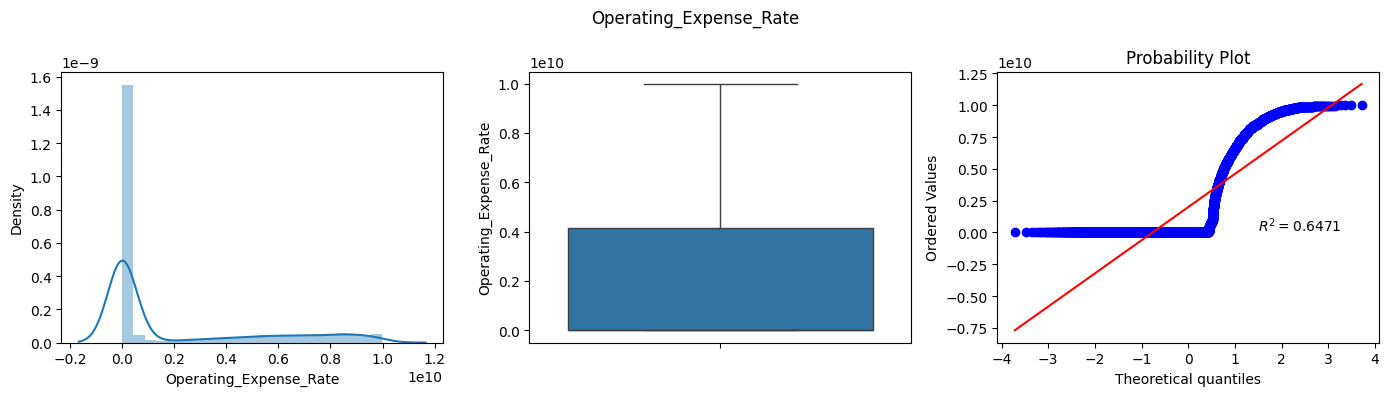

Skewness of Operating_Expense_Rate is : 1.2486733165601693
Kurtosis of Operating_Expense_Rate is : -0.08151166869999527


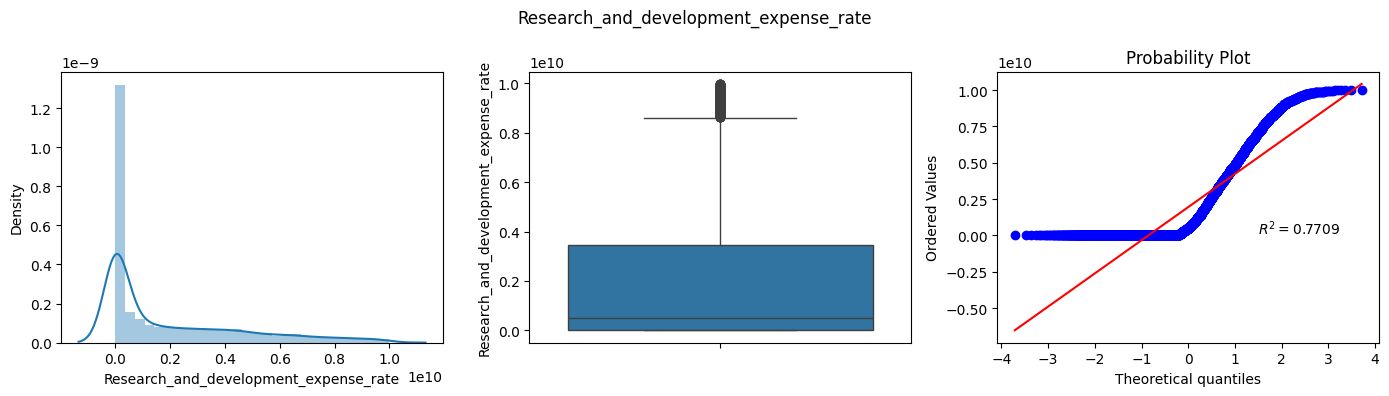

Skewness of Research_and_development_expense_rate is : 1.2820432317125836
Kurtosis of Research_and_development_expense_rate is : 0.5935180951252859


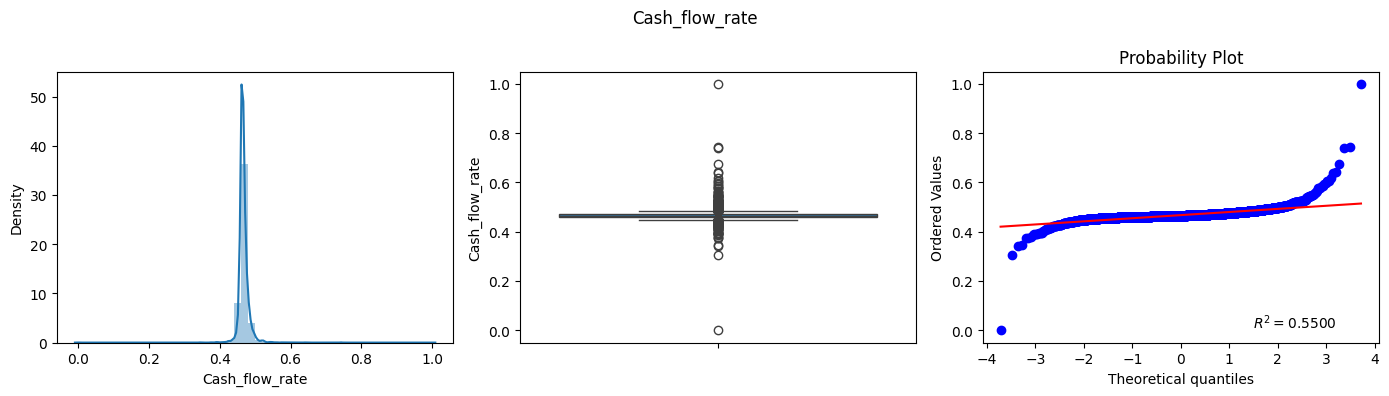

Skewness of Cash_flow_rate is : 3.990585538817217
Kurtosis of Cash_flow_rate is : 257.0127577529456


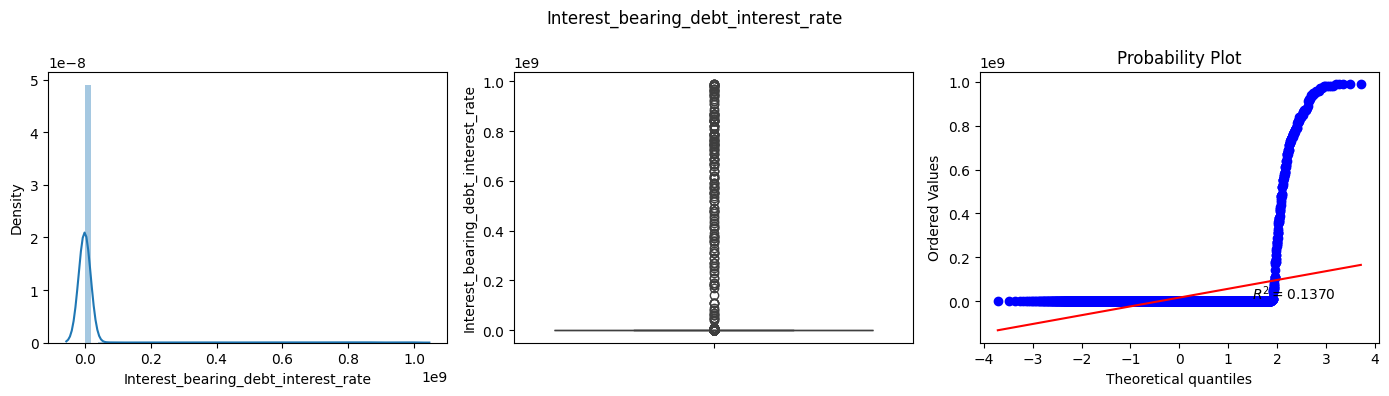

Skewness of Interest_bearing_debt_interest_rate is : 7.033376780370779
Kurtosis of Interest_bearing_debt_interest_rate is : 50.04947819968481


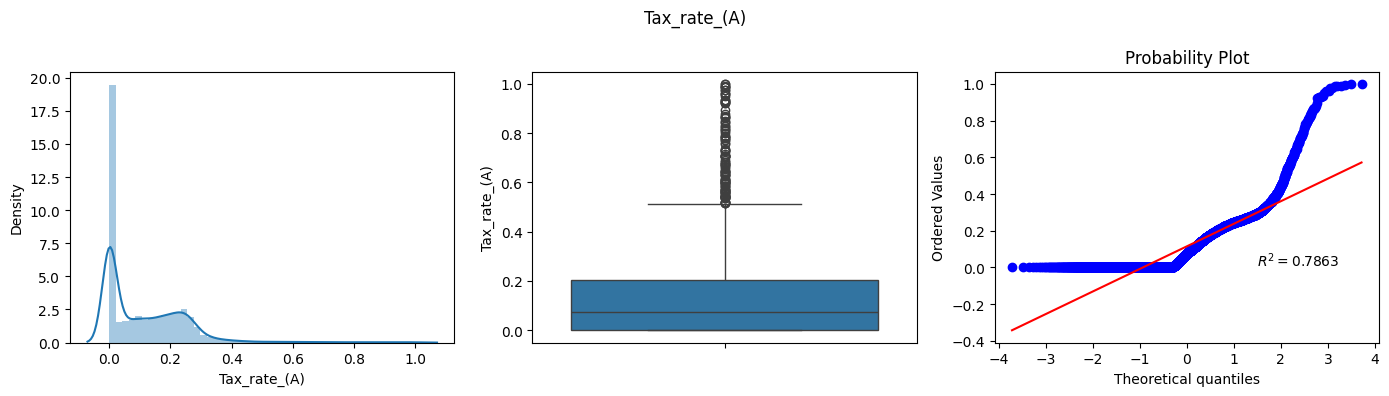

Skewness of Tax_rate_(A) is : 1.903875252639803
Kurtosis of Tax_rate_(A) is : 6.412338808013795


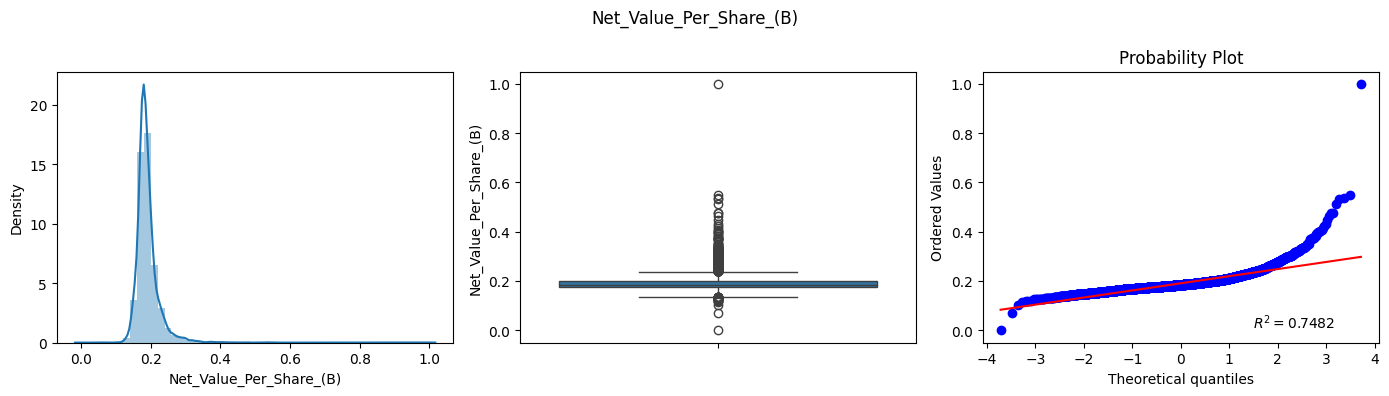

Skewness of Net_Value_Per_Share_(B) is : 4.562322576989663
Kurtosis of Net_Value_Per_Share_(B) is : 64.6769768495687


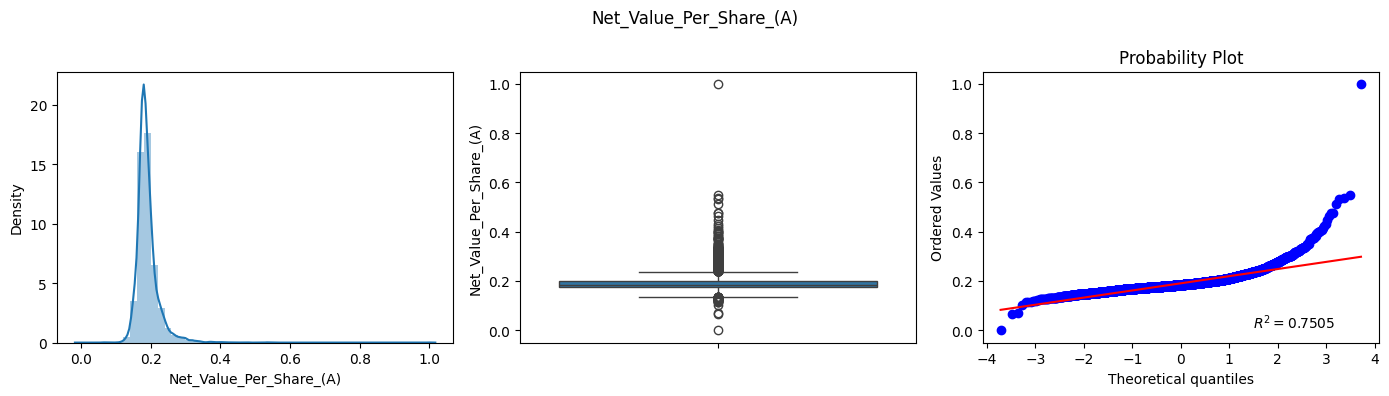

Skewness of Net_Value_Per_Share_(A) is : 4.518132057298601
Kurtosis of Net_Value_Per_Share_(A) is : 64.06107743847966


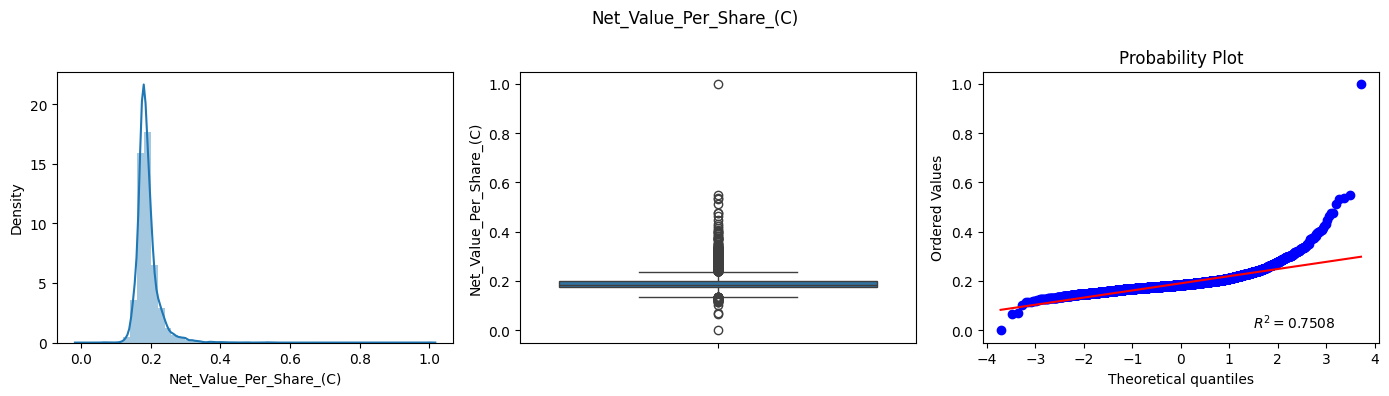

Skewness of Net_Value_Per_Share_(C) is : 4.513740533156161
Kurtosis of Net_Value_Per_Share_(C) is : 63.98976253162403


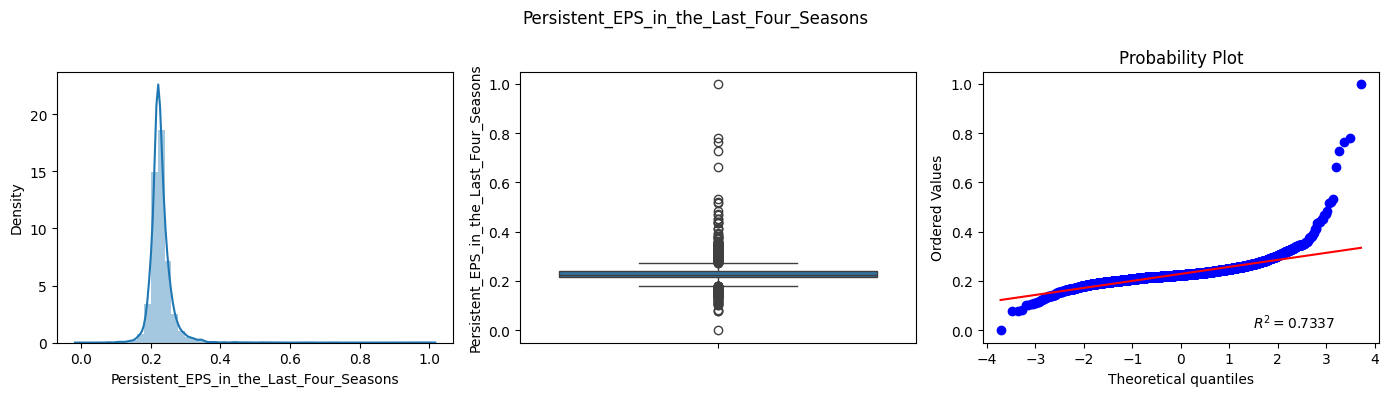

Skewness of Persistent_EPS_in_the_Last_Four_Seasons is : 5.13596305293763
Kurtosis of Persistent_EPS_in_the_Last_Four_Seasons is : 81.62179021840292


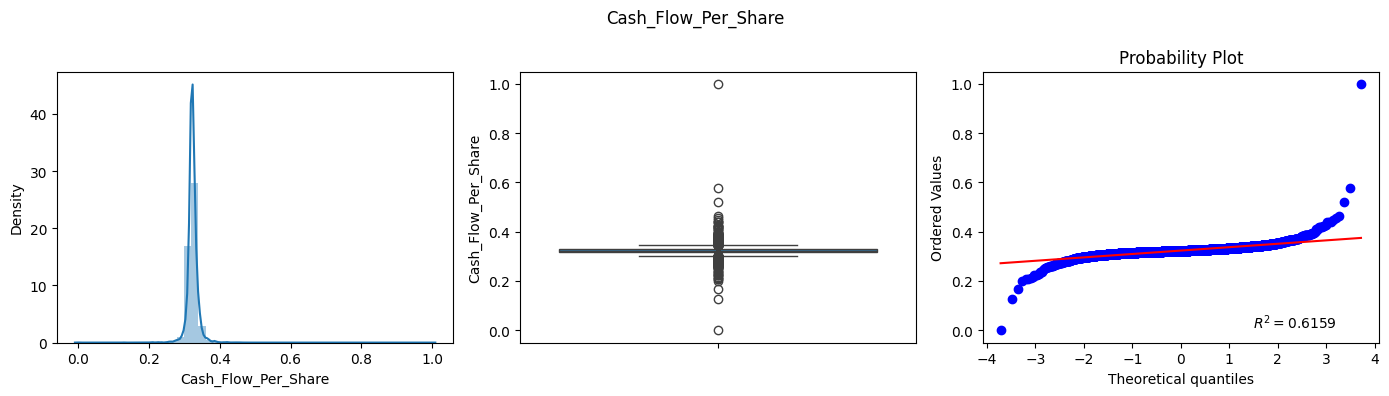

Skewness of Cash_Flow_Per_Share is : 8.018983552793829
Kurtosis of Cash_Flow_Per_Share is : 353.0192205514455


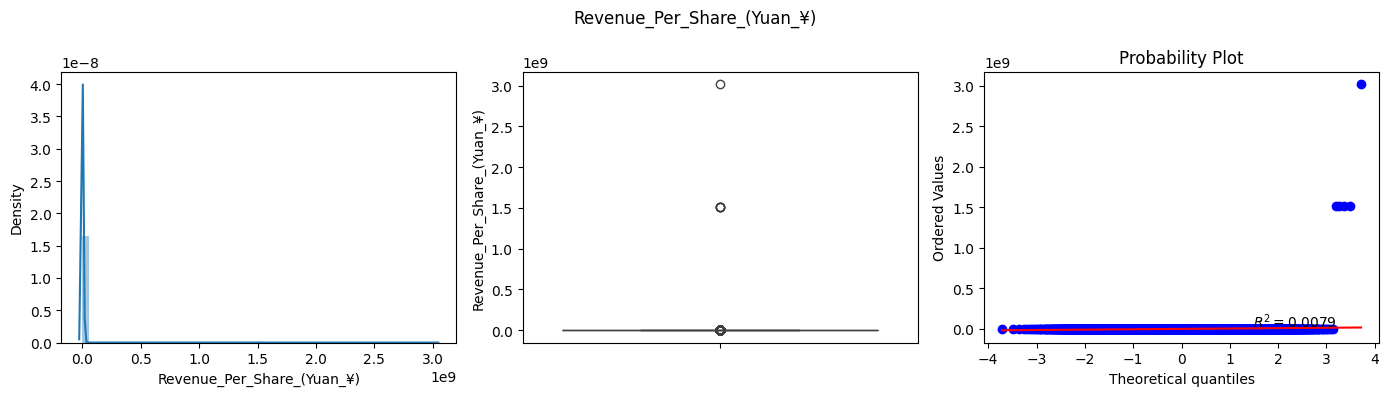

Skewness of Revenue_Per_Share_(Yuan_¥) is : 43.7690982625658
Kurtosis of Revenue_Per_Share_(Yuan_¥) is : 2127.811572204429


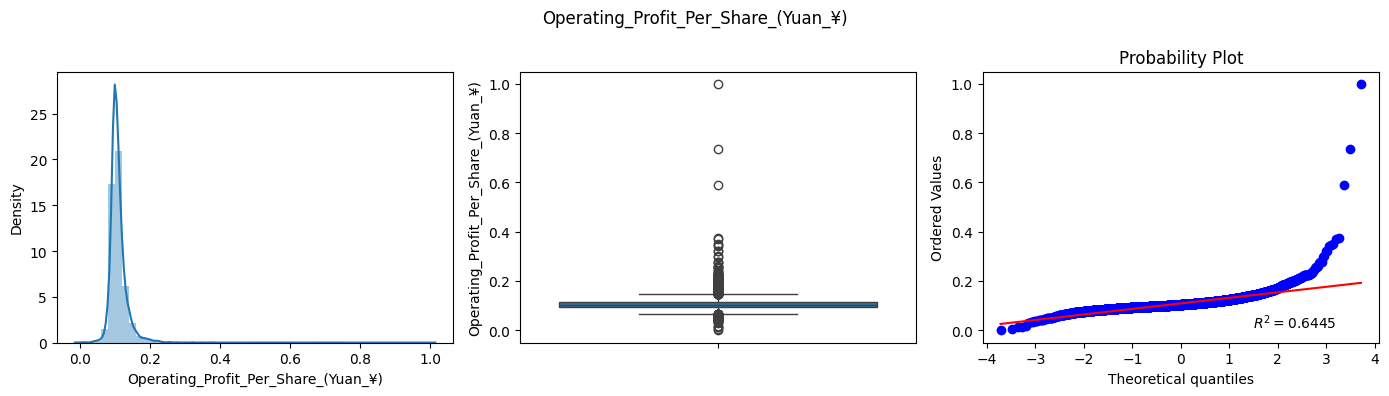

Skewness of Operating_Profit_Per_Share_(Yuan_¥) is : 8.811855619678495
Kurtosis of Operating_Profit_Per_Share_(Yuan_¥) is : 209.3654017963822


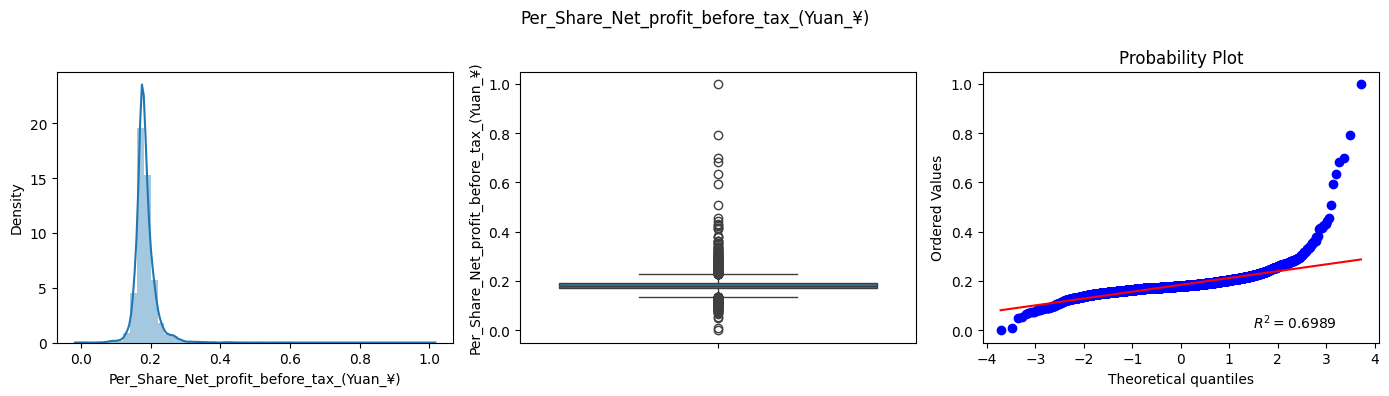

Skewness of Per_Share_Net_profit_before_tax_(Yuan_¥) is : 6.002590150781108
Kurtosis of Per_Share_Net_profit_before_tax_(Yuan_¥) is : 100.65873583703488


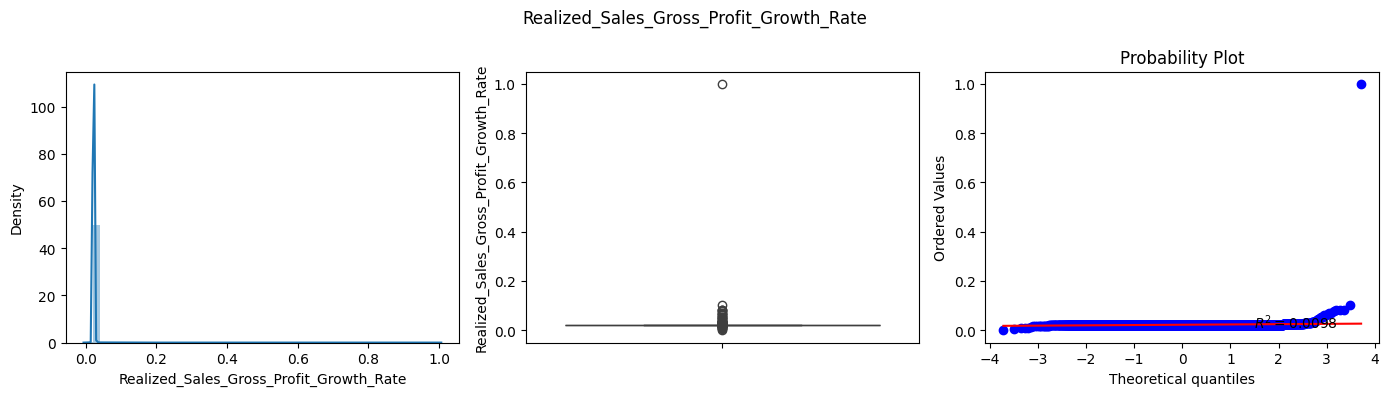

Skewness of Realized_Sales_Gross_Profit_Growth_Rate is : 77.92510905908482
Kurtosis of Realized_Sales_Gross_Profit_Growth_Rate is : 6295.616592870354


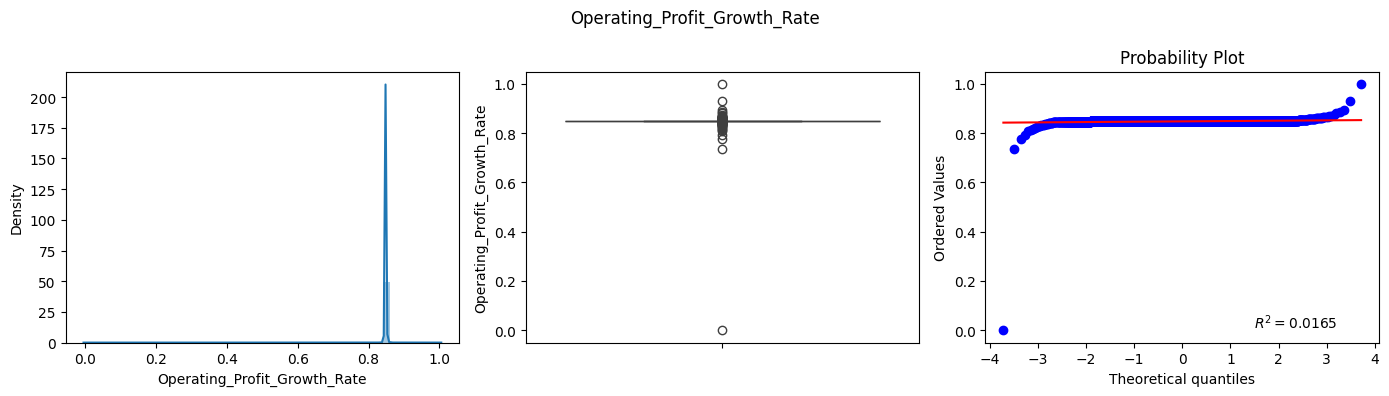

Skewness of Operating_Profit_Growth_Rate is : -71.68895016582744
Kurtosis of Operating_Profit_Growth_Rate is : 5684.153243539675


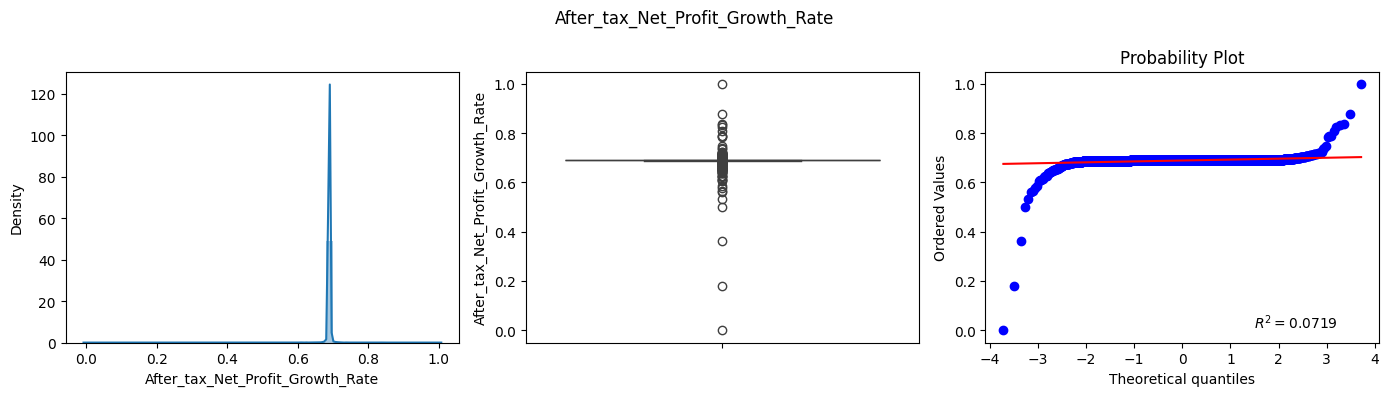

Skewness of After_tax_Net_Profit_Growth_Rate is : -25.58336694298504
Kurtosis of After_tax_Net_Profit_Growth_Rate is : 1268.0532691998003


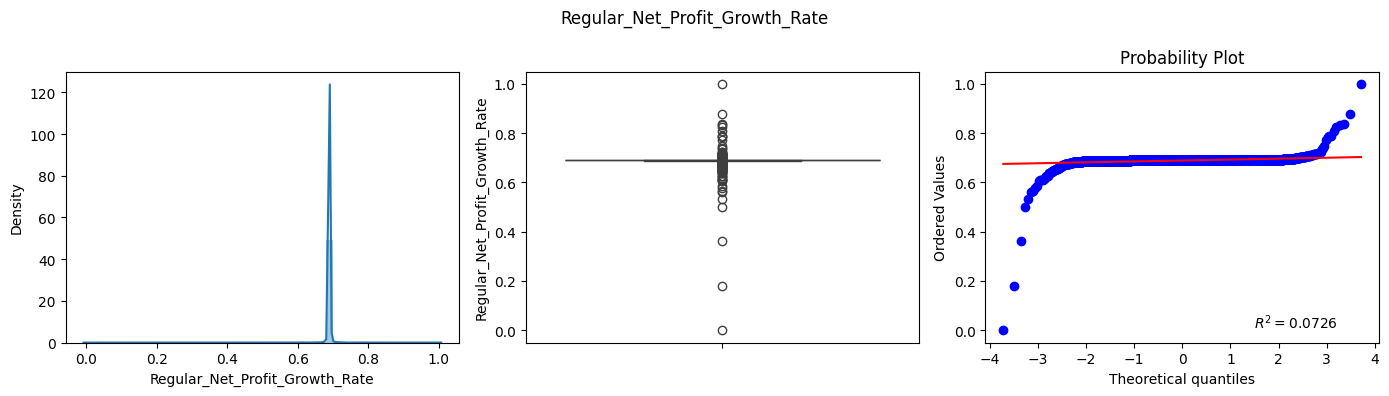

Skewness of Regular_Net_Profit_Growth_Rate is : -25.262840959449818
Kurtosis of Regular_Net_Profit_Growth_Rate is : 1247.6219738294922


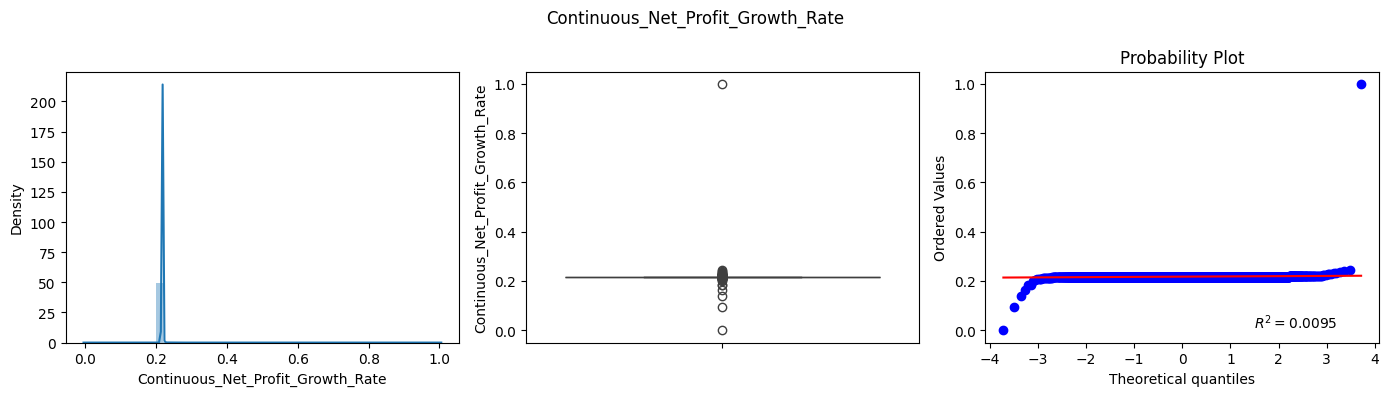

Skewness of Continuous_Net_Profit_Growth_Rate is : 67.09753430866733
Kurtosis of Continuous_Net_Profit_Growth_Rate is : 5396.572181859231


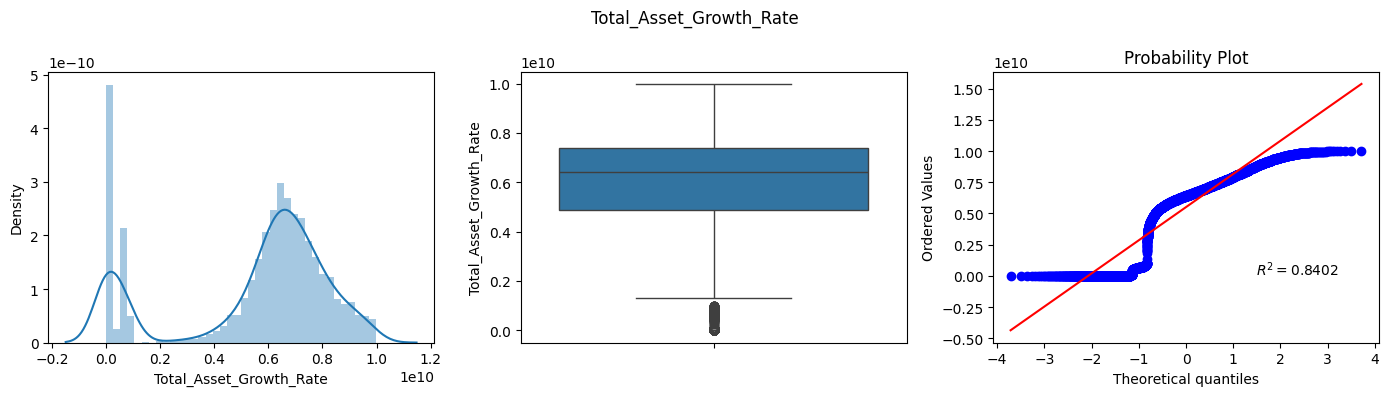

Skewness of Total_Asset_Growth_Rate is : -0.9187910949038905
Kurtosis of Total_Asset_Growth_Rate is : -0.41665952702429543


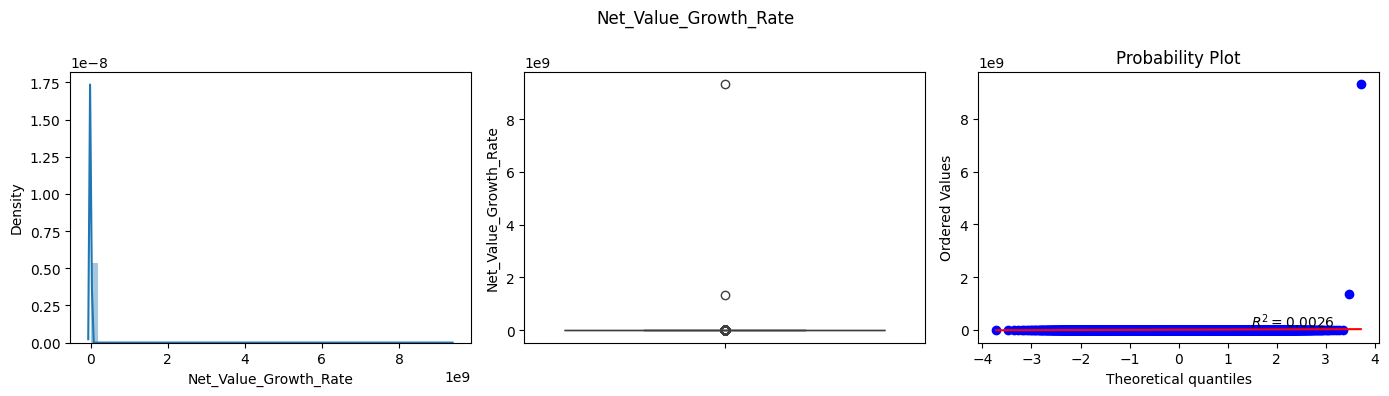

Skewness of Net_Value_Growth_Rate is : 80.29184419453097
Kurtosis of Net_Value_Growth_Rate is : 6544.9153900061565


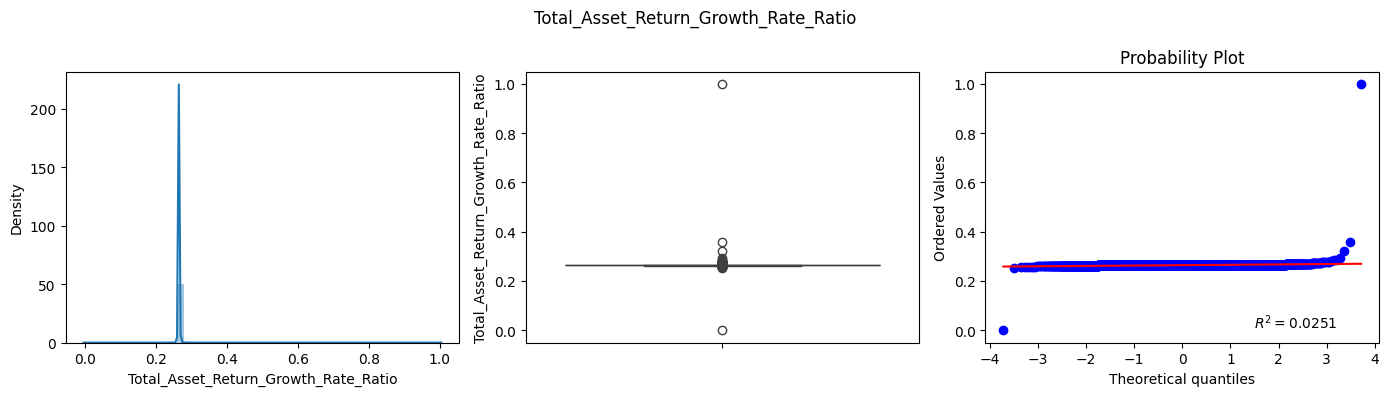

Skewness of Total_Asset_Return_Growth_Rate_Ratio is : 62.499961053073136
Kurtosis of Total_Asset_Return_Growth_Rate_Ratio is : 5074.957173470536


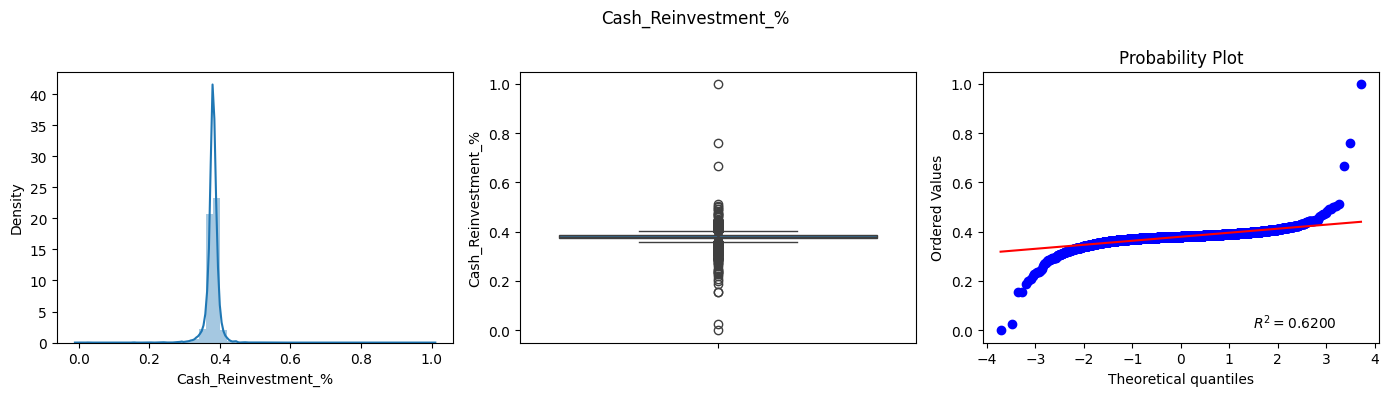

Skewness of Cash_Reinvestment_% is : 2.318244374516142
Kurtosis of Cash_Reinvestment_% is : 179.0532158732448


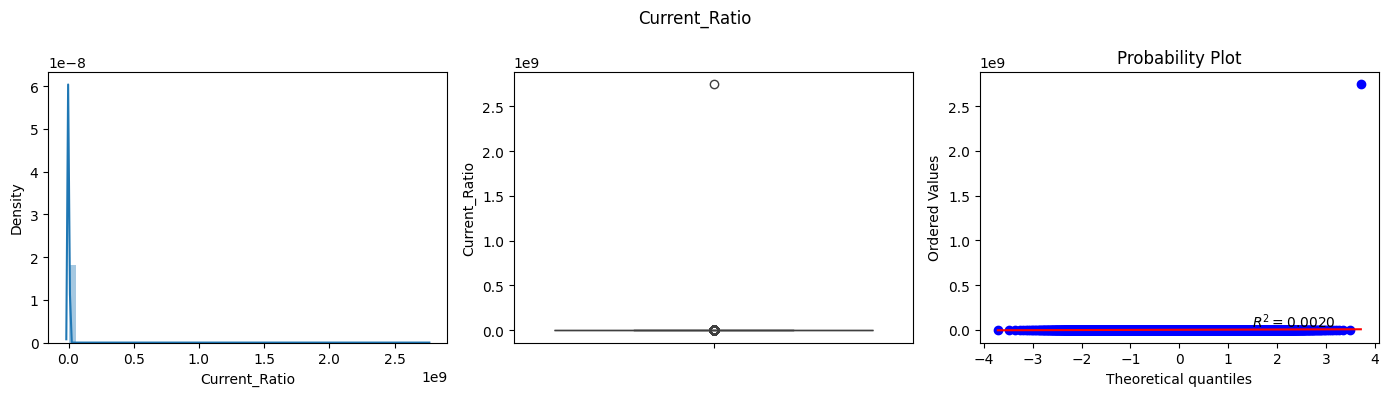

Skewness of Current_Ratio is : 82.57723657279894
Kurtosis of Current_Ratio is : 6818.999999999998


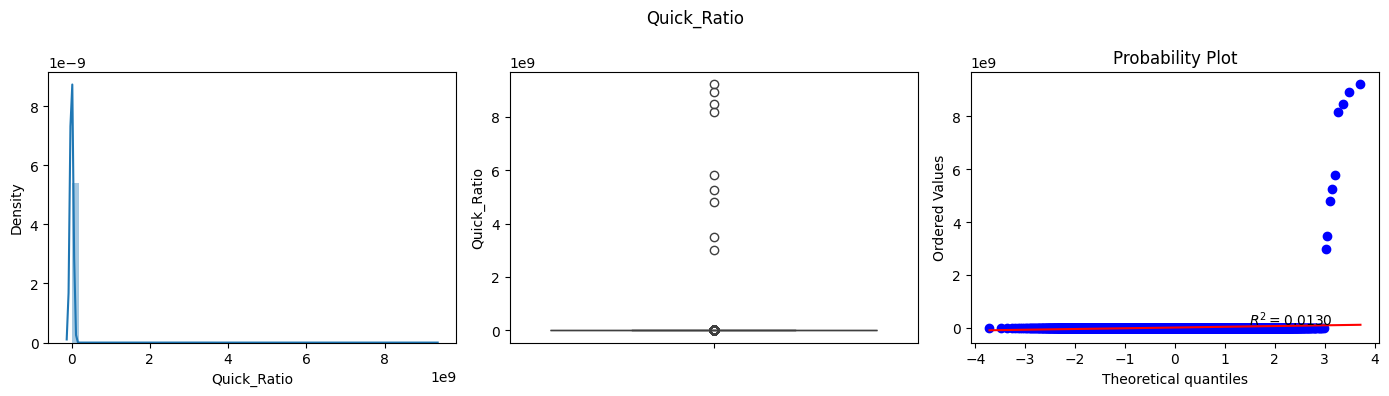

Skewness of Quick_Ratio is : 31.644913015411564
Kurtosis of Quick_Ratio is : 1051.7233183833025


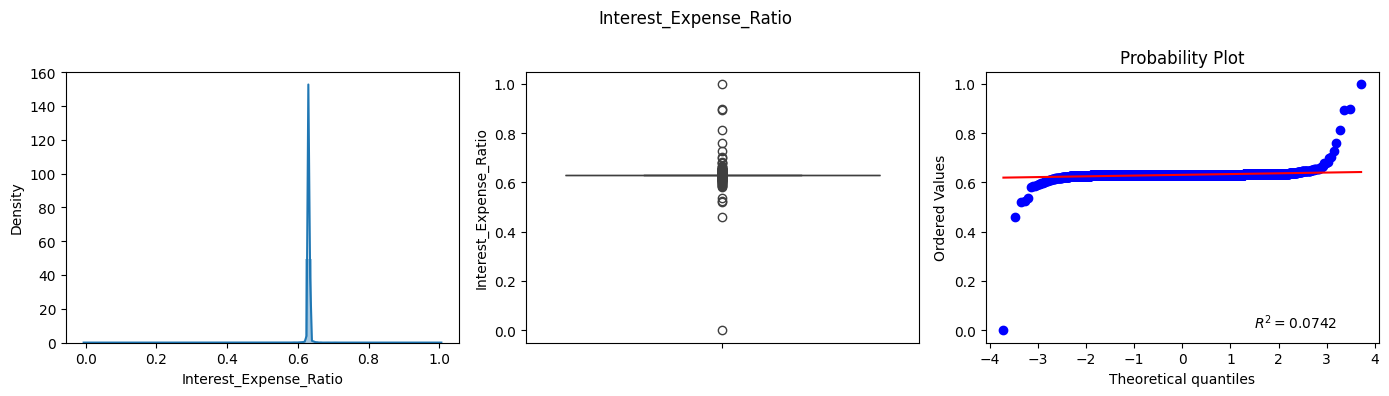

Skewness of Interest_Expense_Ratio is : -16.822554123130764
Kurtosis of Interest_Expense_Ratio is : 1741.3016540350882


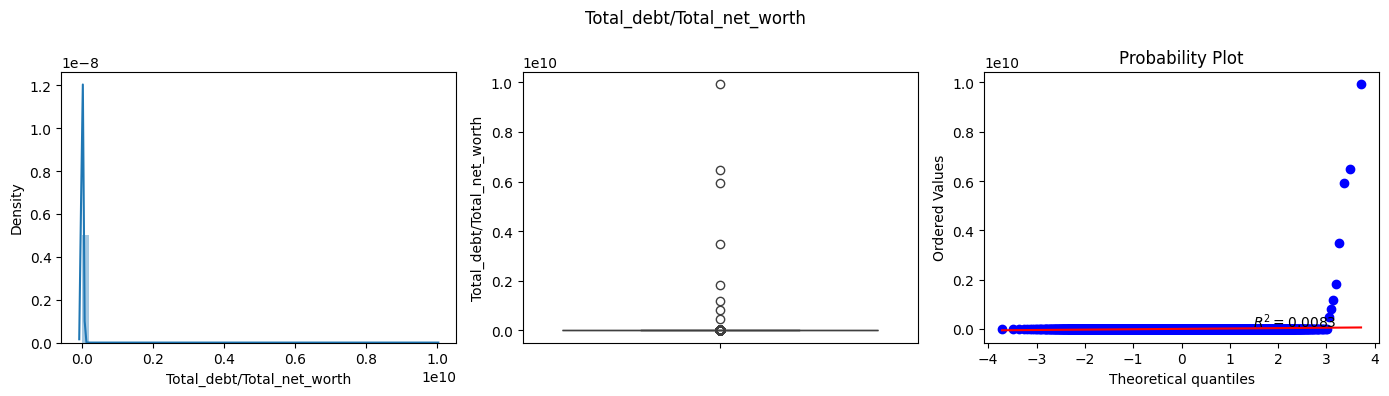

Skewness of Total_debt/Total_net_worth is : 46.355335845692984
Kurtosis of Total_debt/Total_net_worth is : 2348.240302316803


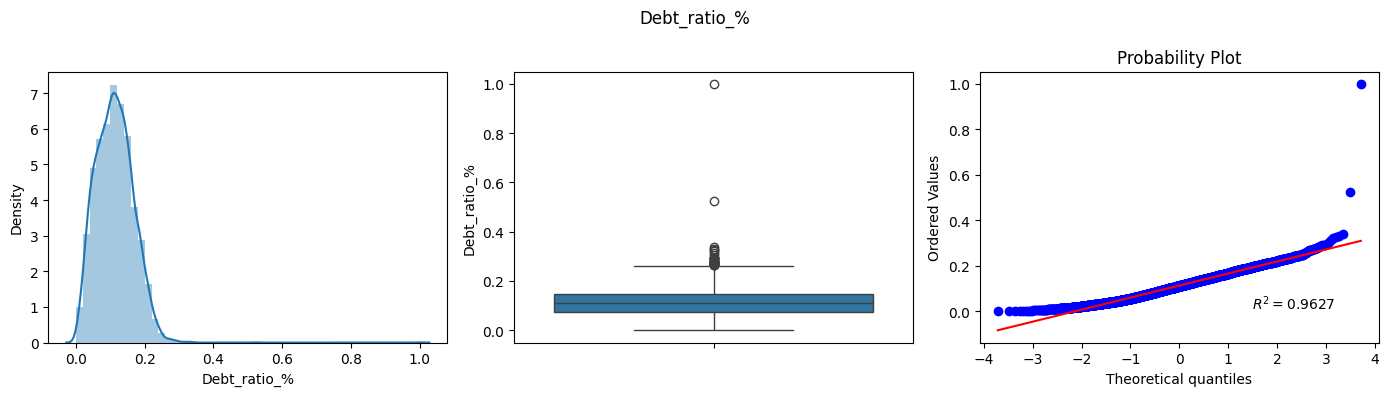

Skewness of Debt_ratio_% is : 0.98079611678978
Kurtosis of Debt_ratio_% is : 10.729727262534775


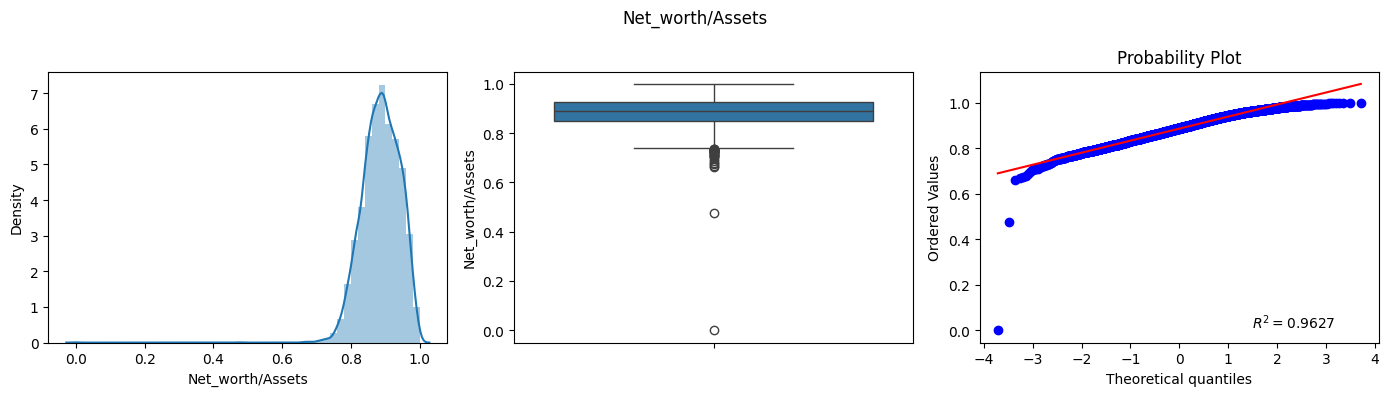

Skewness of Net_worth/Assets is : -0.9807961167897898
Kurtosis of Net_worth/Assets is : 10.729727262534793


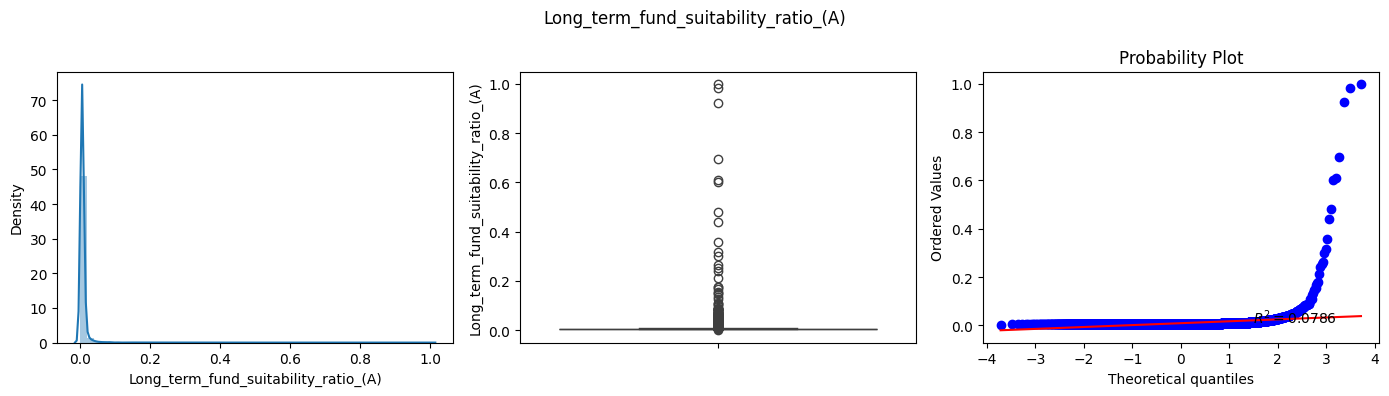

Skewness of Long_term_fund_suitability_ratio_(A) is : 24.96787271736492
Kurtosis of Long_term_fund_suitability_ratio_(A) is : 741.3864280461478


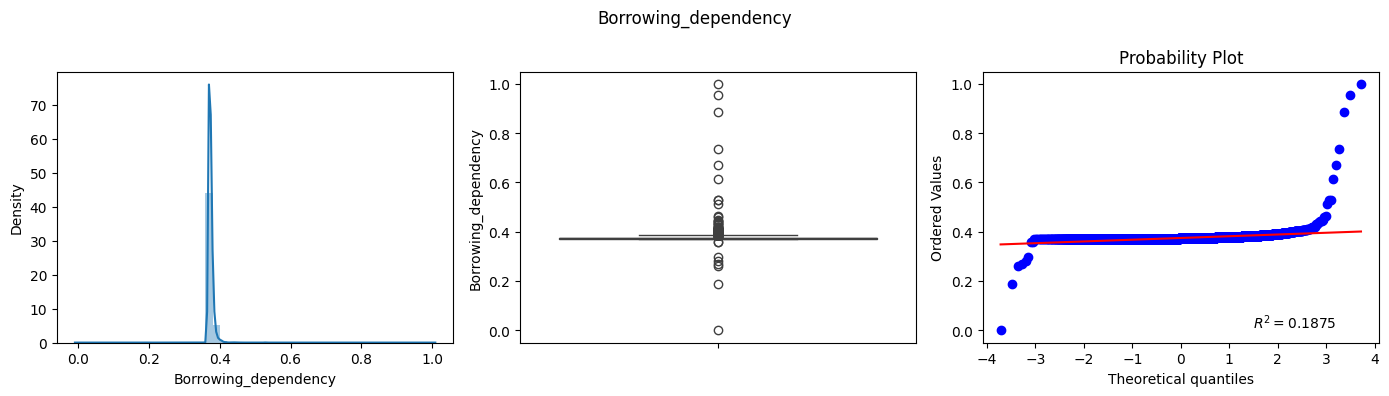

Skewness of Borrowing_dependency is : 20.838890887338852
Kurtosis of Borrowing_dependency is : 802.6464926904096


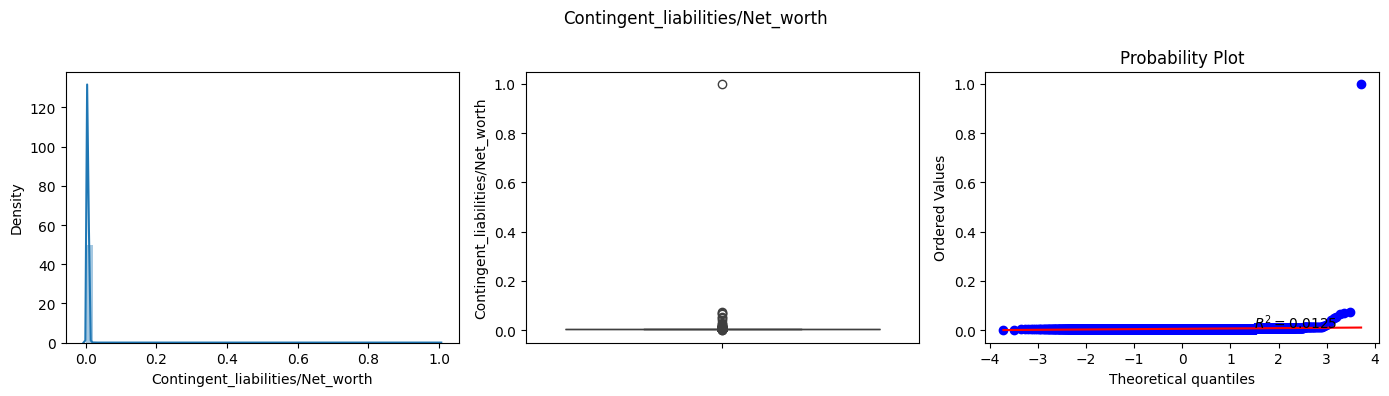

Skewness of Contingent_liabilities/Net_worth is : 79.67062005225556
Kurtosis of Contingent_liabilities/Net_worth is : 6491.885472505623


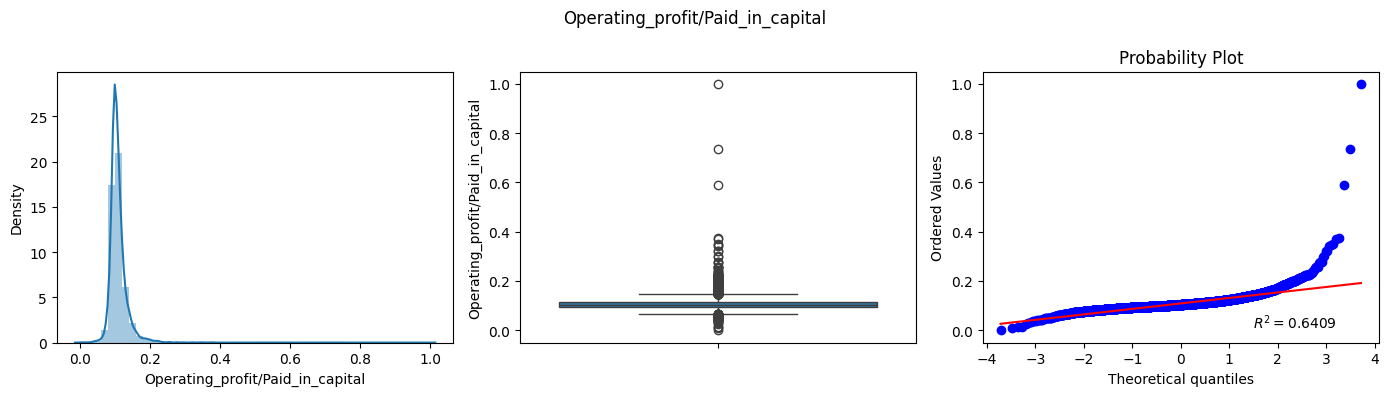

Skewness of Operating_profit/Paid_in_capital is : 8.949387100606499
Kurtosis of Operating_profit/Paid_in_capital is : 214.23313628156882


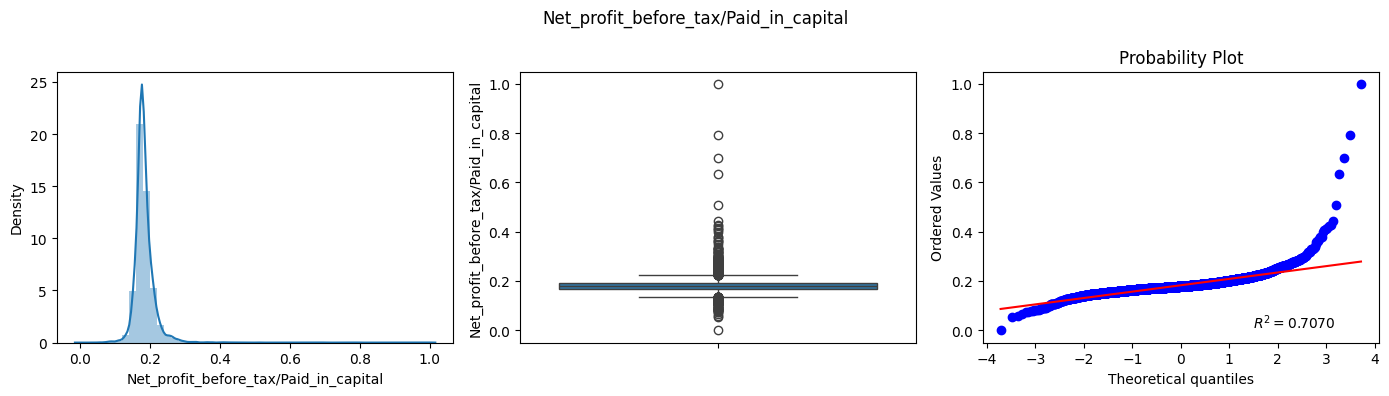

Skewness of Net_profit_before_tax/Paid_in_capital is : 6.379425570765882
Kurtosis of Net_profit_before_tax/Paid_in_capital is : 120.99777362028755


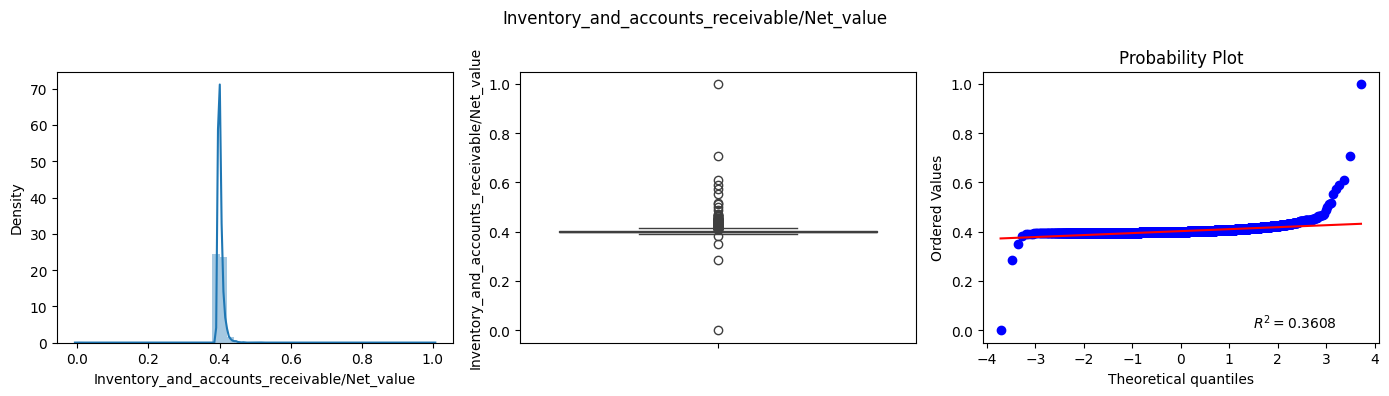

Skewness of Inventory_and_accounts_receivable/Net_value is : 13.112234234219
Kurtosis of Inventory_and_accounts_receivable/Net_value is : 778.9544307990403


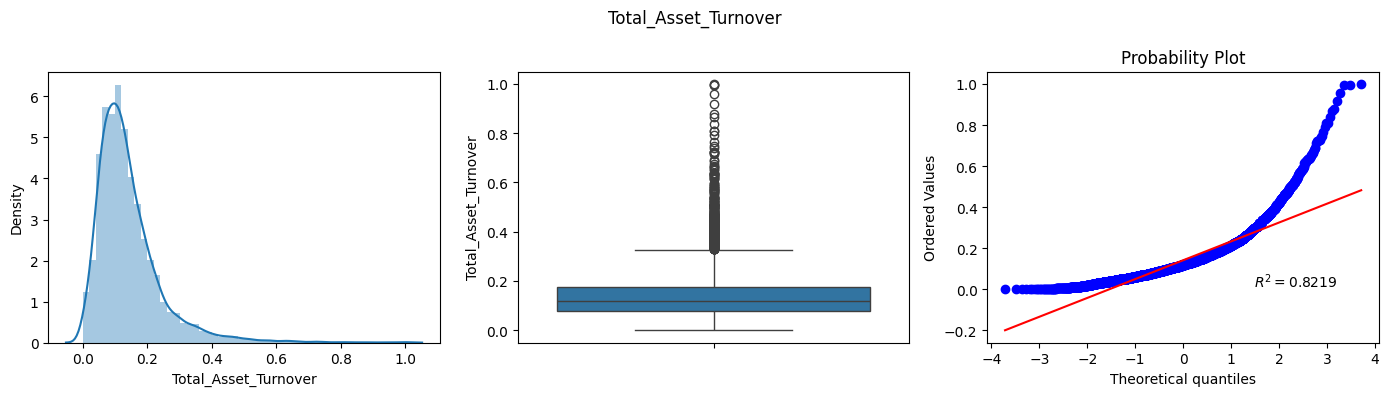

Skewness of Total_Asset_Turnover is : 2.3409066223409676
Kurtosis of Total_Asset_Turnover is : 9.506233123702605


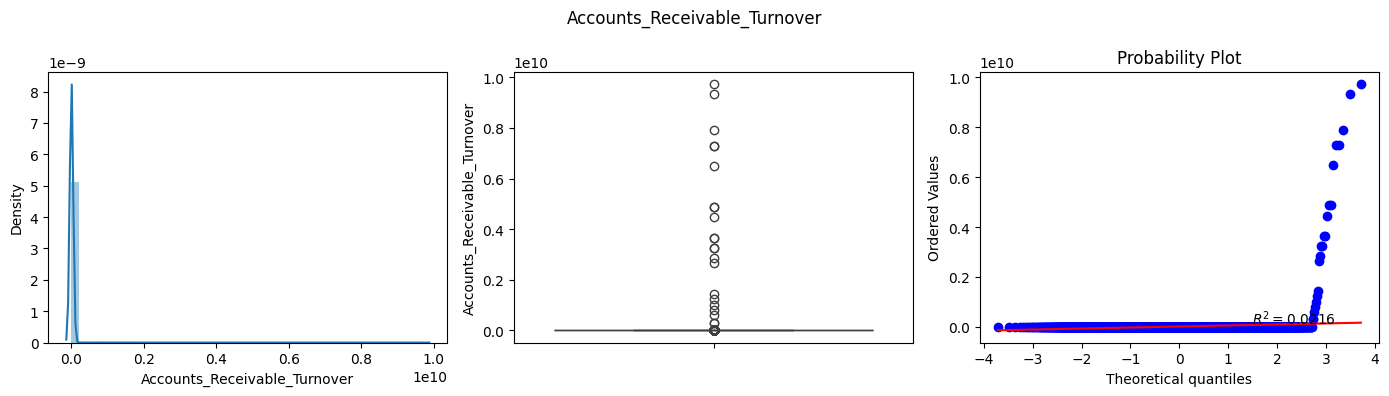

Skewness of Accounts_Receivable_Turnover is : 25.84654655099649
Kurtosis of Accounts_Receivable_Turnover is : 730.8881628306647


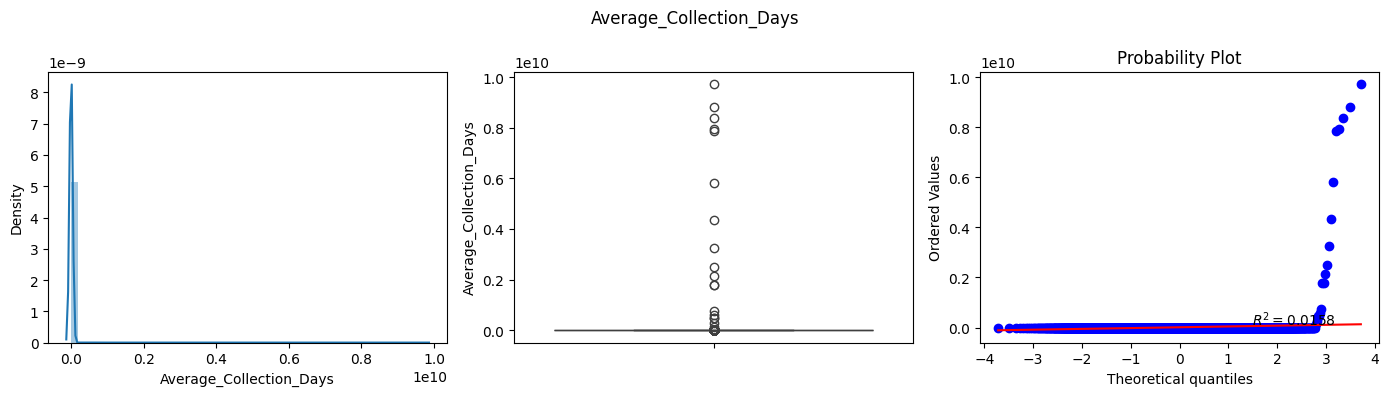

Skewness of Average_Collection_Days is : 30.58008623206861
Kurtosis of Average_Collection_Days is : 989.7354450426537


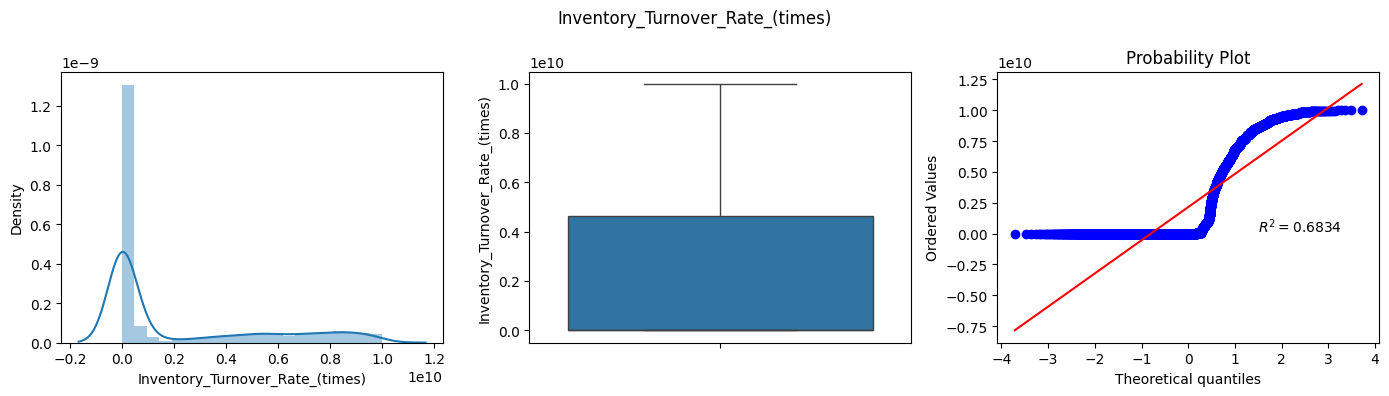

Skewness of Inventory_Turnover_Rate_(times) is : 1.1372886202283368
Kurtosis of Inventory_Turnover_Rate_(times) is : -0.3237645030283218


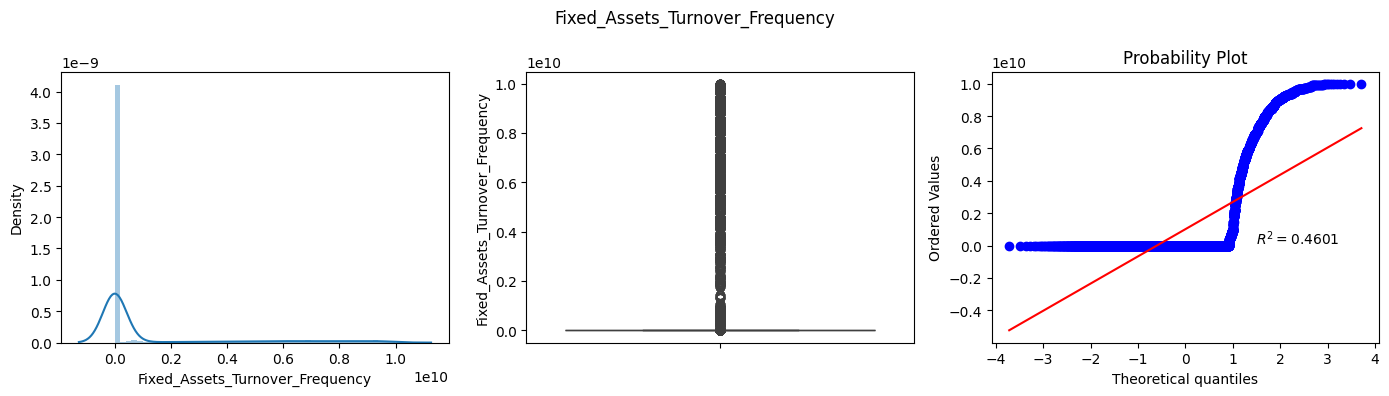

Skewness of Fixed_Assets_Turnover_Frequency is : 2.349802853236018
Kurtosis of Fixed_Assets_Turnover_Frequency is : 4.090862086239142


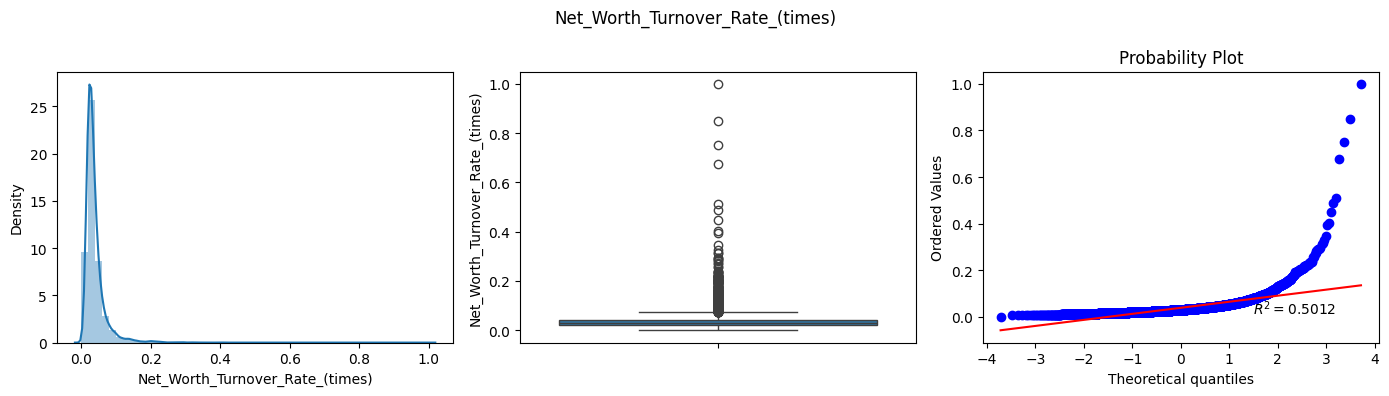

Skewness of Net_Worth_Turnover_Rate_(times) is : 8.9618483104736
Kurtosis of Net_Worth_Turnover_Rate_(times) is : 157.03797372678366


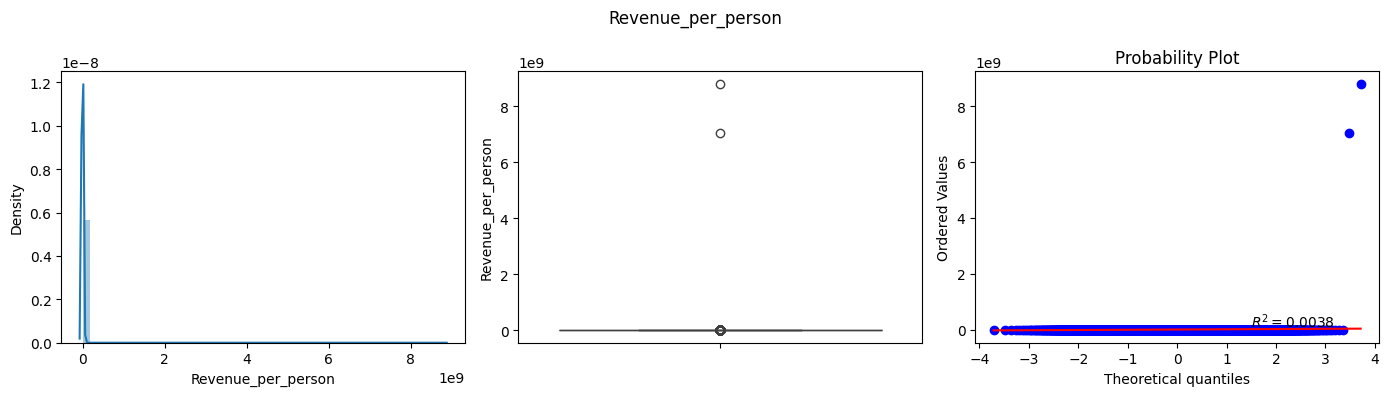

Skewness of Revenue_per_person is : 59.434479930512104
Kurtosis of Revenue_per_person is : 3571.0270387802907


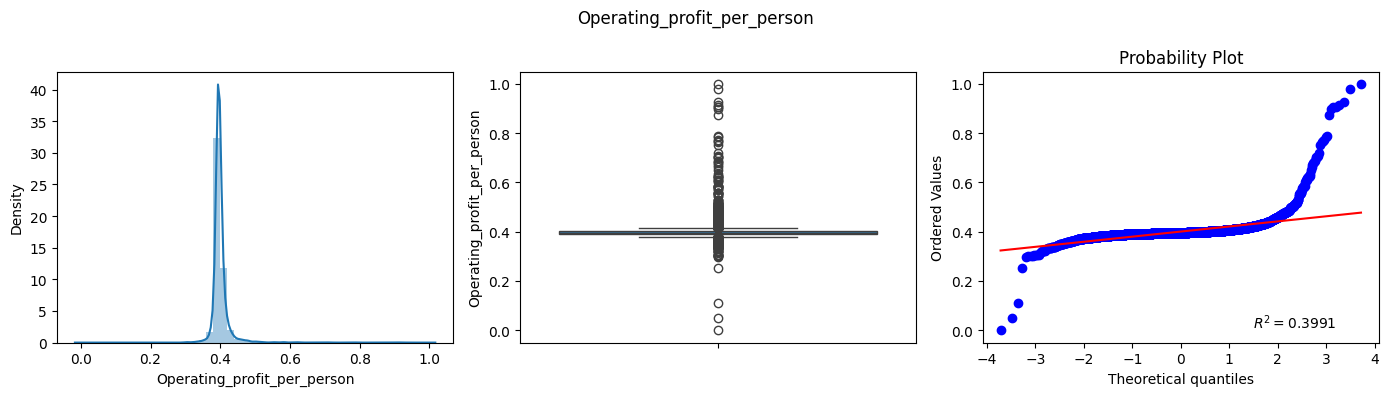

Skewness of Operating_profit_per_person is : 7.788299483017489
Kurtosis of Operating_profit_per_person is : 114.39423583623136


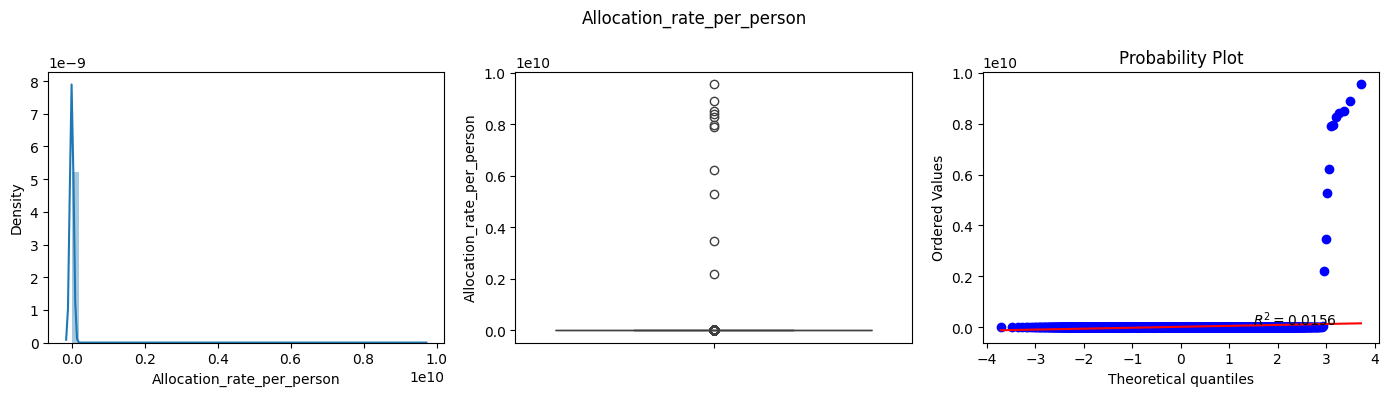

Skewness of Allocation_rate_per_person is : 27.47614476109999
Kurtosis of Allocation_rate_per_person is : 773.8112325412774


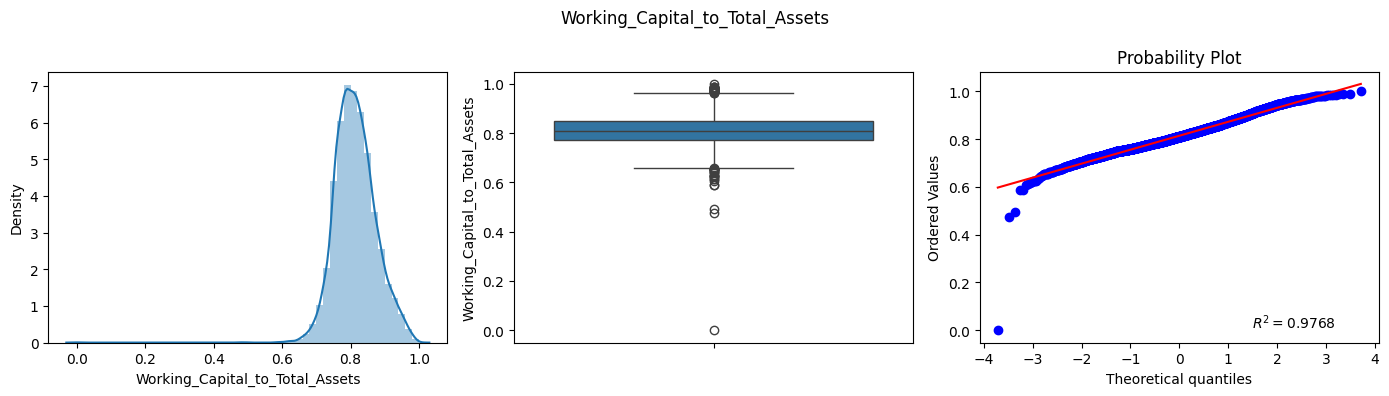

Skewness of Working_Capital_to_Total_Assets is : -0.19231134759016005
Kurtosis of Working_Capital_to_Total_Assets is : 5.5138002148064


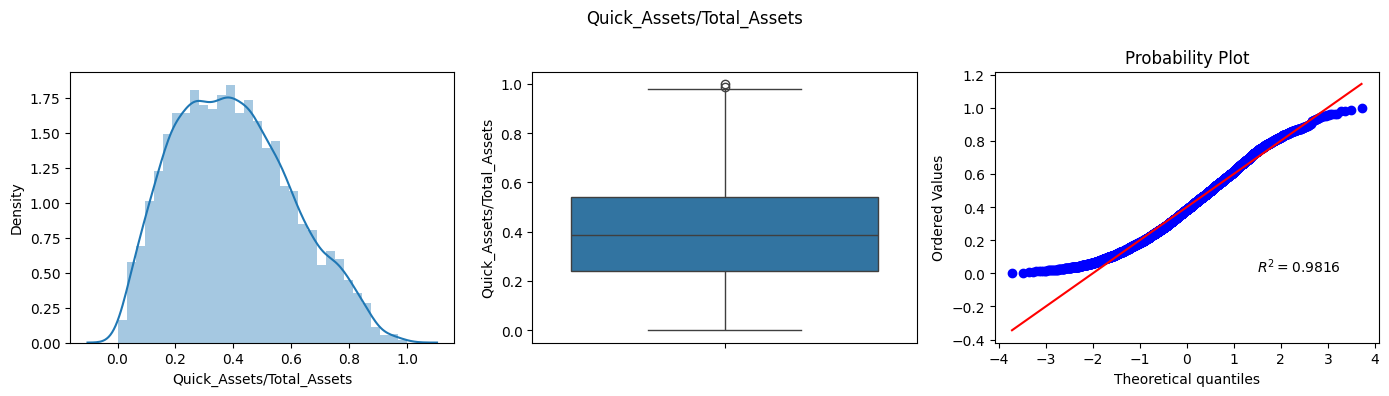

Skewness of Quick_Assets/Total_Assets is : 0.33731467553390343
Kurtosis of Quick_Assets/Total_Assets is : -0.5631275506723155


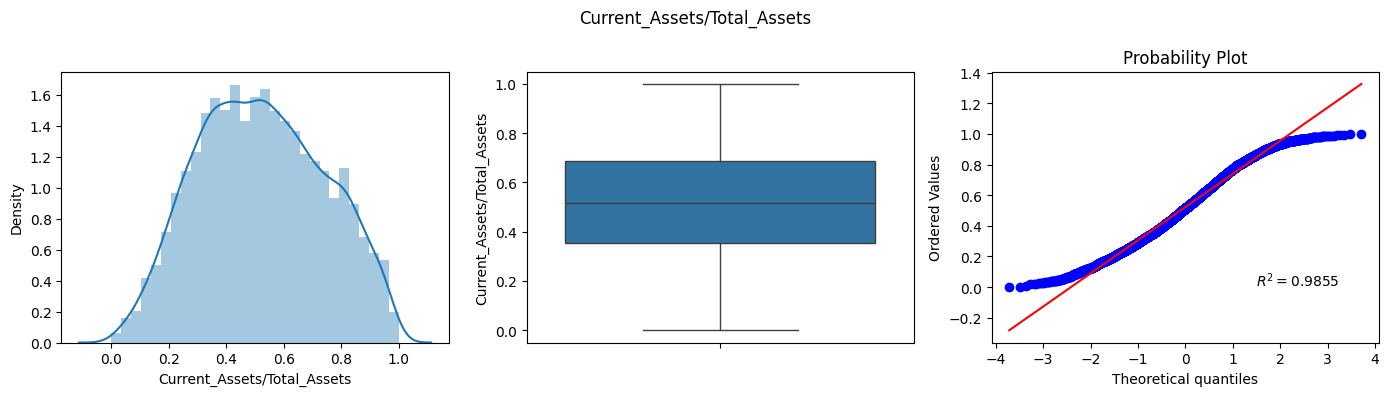

Skewness of Current_Assets/Total_Assets is : 0.07589030532976256
Kurtosis of Current_Assets/Total_Assets is : -0.8030559626739624


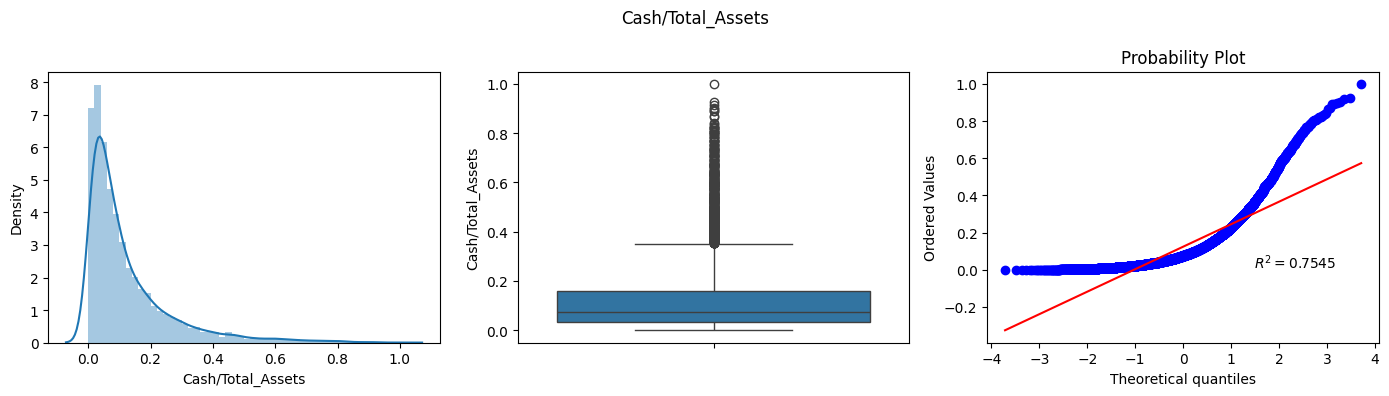

Skewness of Cash/Total_Assets is : 2.2303602460630274
Kurtosis of Cash/Total_Assets is : 5.90986640621092


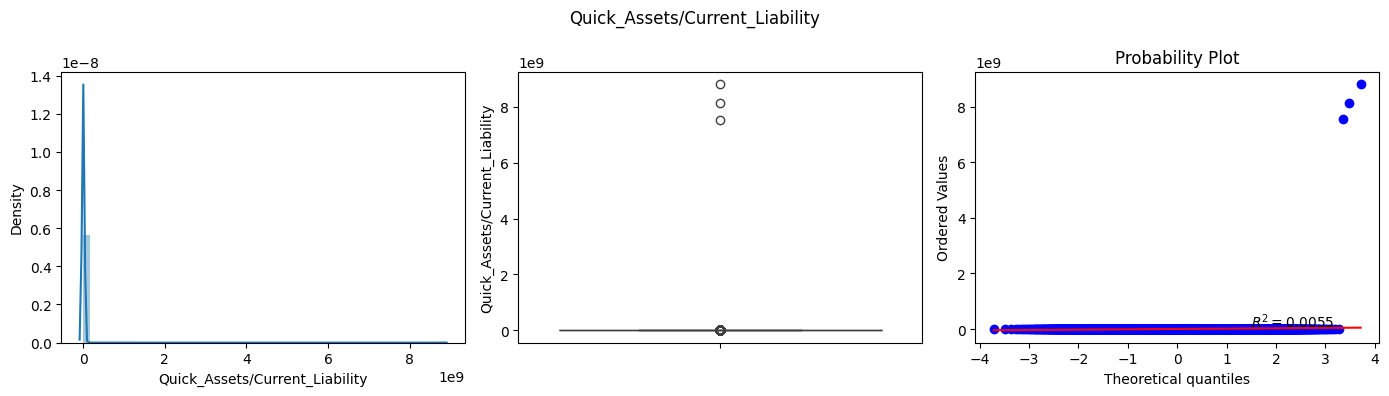

Skewness of Quick_Assets/Current_Liability is : 47.94729978116933
Kurtosis of Quick_Assets/Current_Liability is : 2306.8703561682737


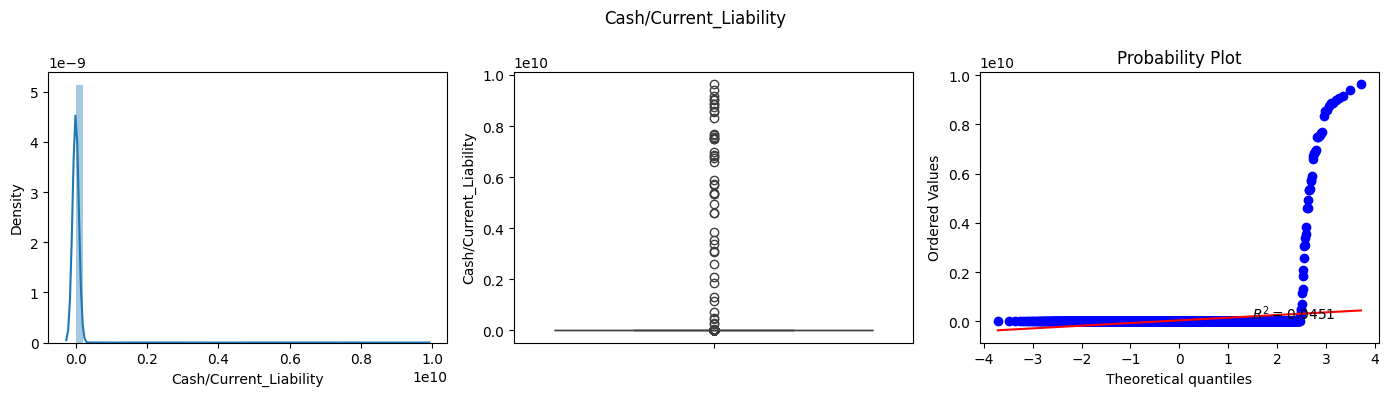

Skewness of Cash/Current_Liability is : 14.863767667730757
Kurtosis of Cash/Current_Liability is : 229.39695207189294


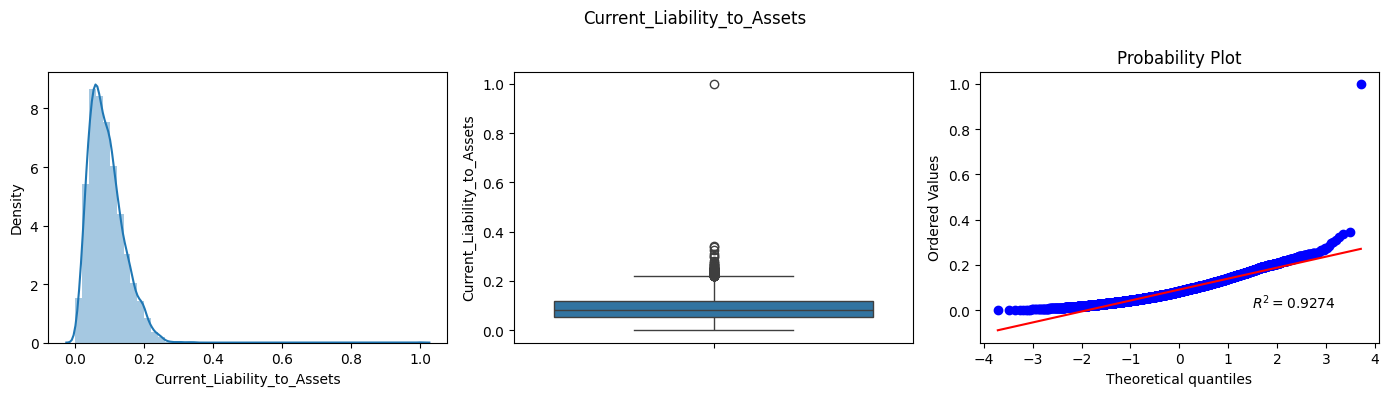

Skewness of Current_Liability_to_Assets is : 1.6082034066471063
Kurtosis of Current_Liability_to_Assets is : 15.870087623439169


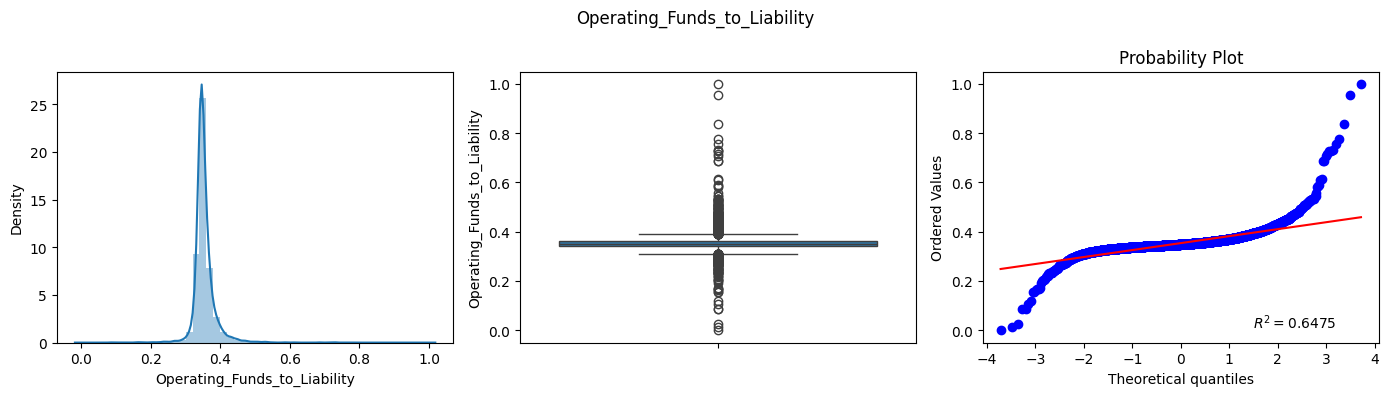

Skewness of Operating_Funds_to_Liability is : 3.777297287701786
Kurtosis of Operating_Funds_to_Liability is : 60.98173219547968


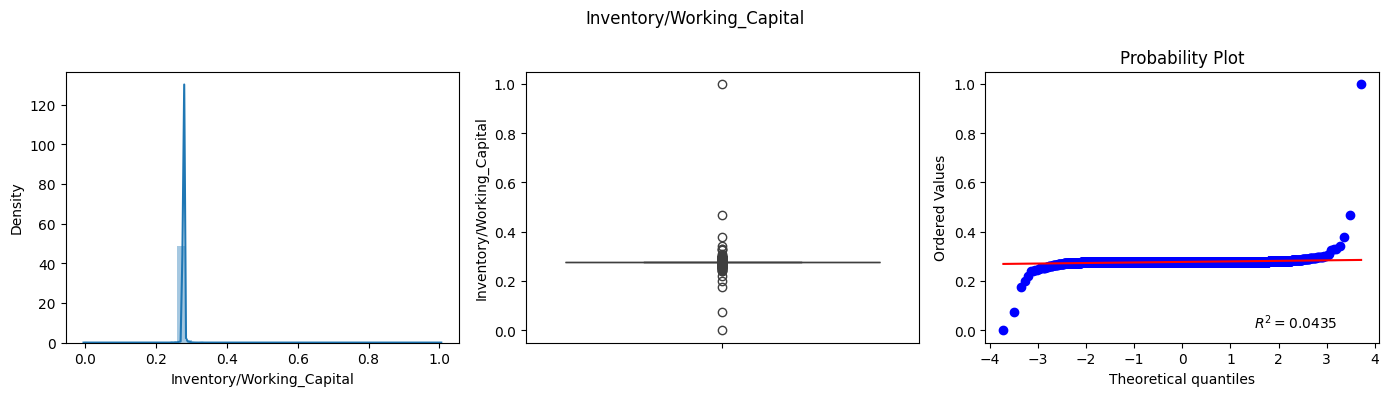

Skewness of Inventory/Working_Capital is : 45.33224964551143
Kurtosis of Inventory/Working_Capital is : 3441.470032229755


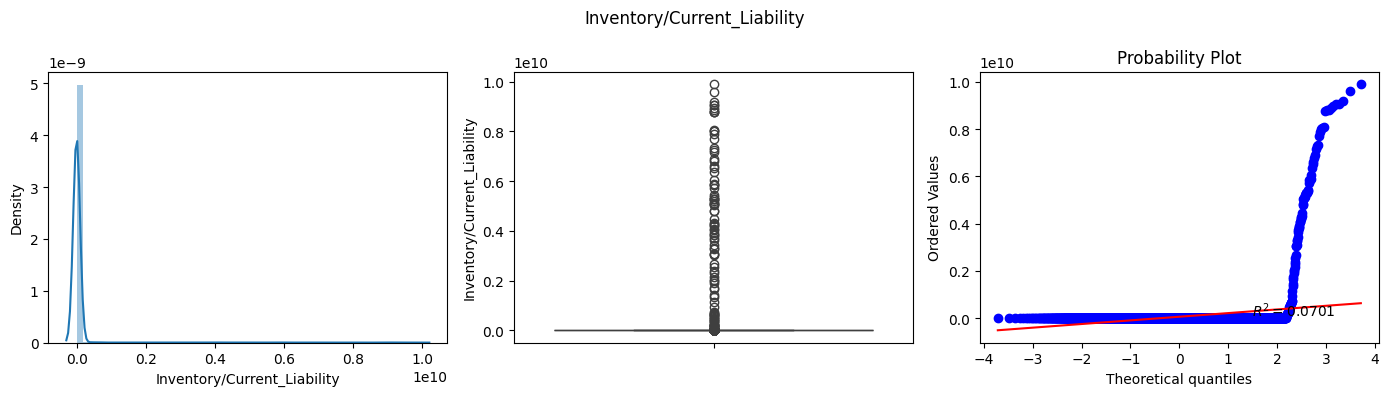

Skewness of Inventory/Current_Liability is : 11.965588148251964
Kurtosis of Inventory/Current_Liability is : 153.4177212306721


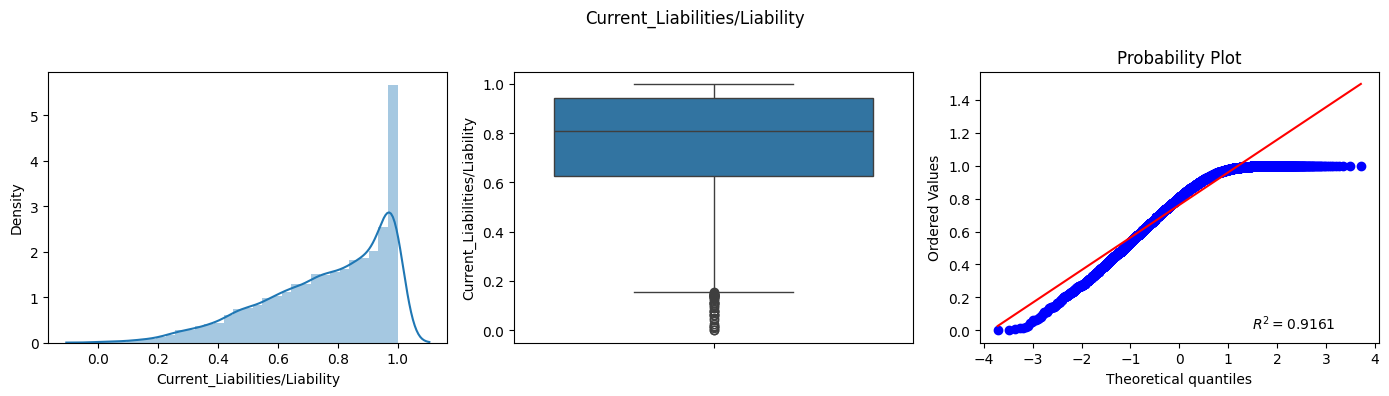

Skewness of Current_Liabilities/Liability is : -0.8350469004780781
Kurtosis of Current_Liabilities/Liability is : -0.0016292559796537986


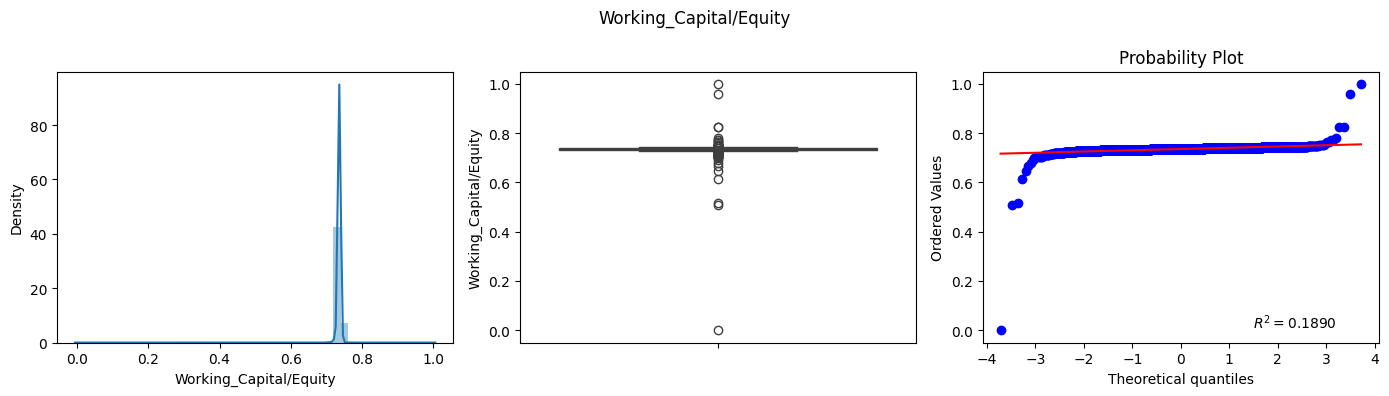

Skewness of Working_Capital/Equity is : -36.20365404366997
Kurtosis of Working_Capital/Equity is : 2412.933187437684


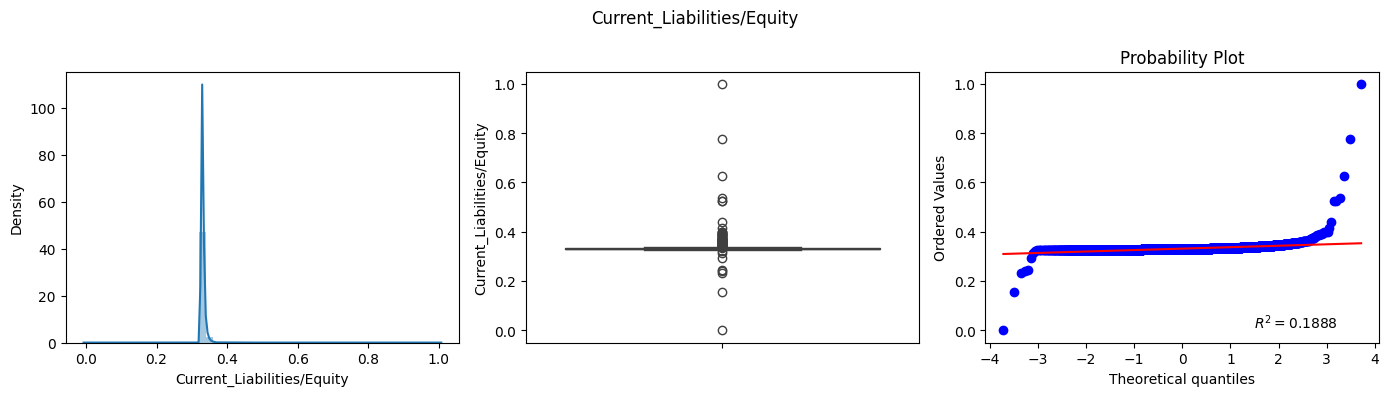

Skewness of Current_Liabilities/Equity is : 23.799164734548174
Kurtosis of Current_Liabilities/Equity is : 1171.460092252544


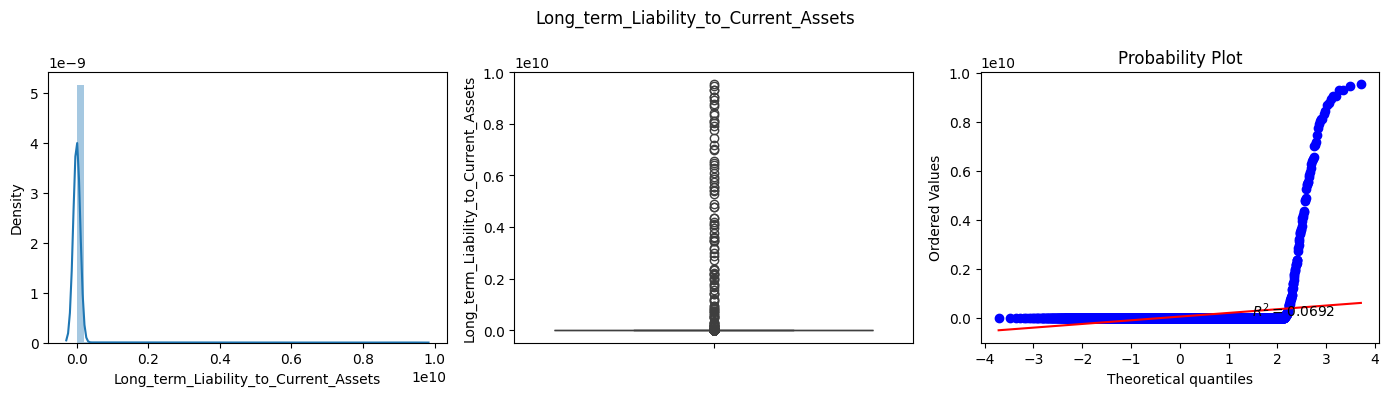

Skewness of Long_term_Liability_to_Current_Assets is : 12.401607114804376
Kurtosis of Long_term_Liability_to_Current_Assets is : 164.8900136718652


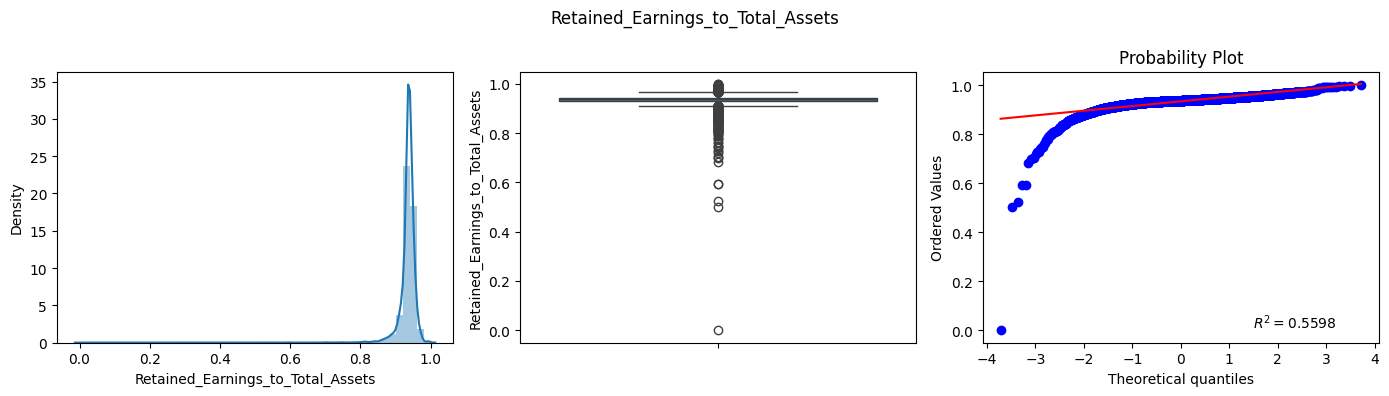

Skewness of Retained_Earnings_to_Total_Assets is : -11.139573972107833
Kurtosis of Retained_Earnings_to_Total_Assets is : 303.6265730895294


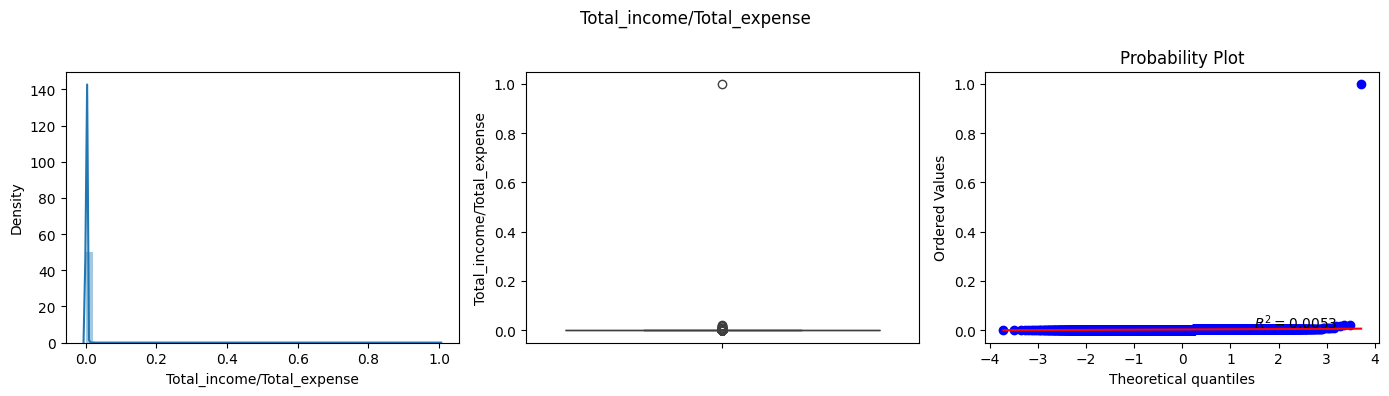

Skewness of Total_income/Total_expense is : 82.33242377959915
Kurtosis of Total_income/Total_expense is : 6791.883496927187


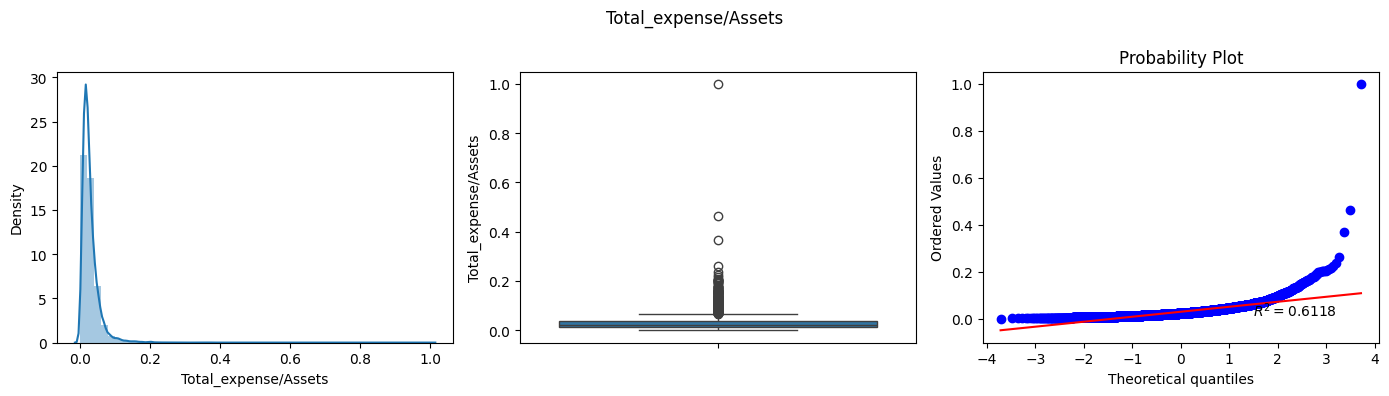

Skewness of Total_expense/Assets is : 9.481727551323877
Kurtosis of Total_expense/Assets is : 259.6642157737628


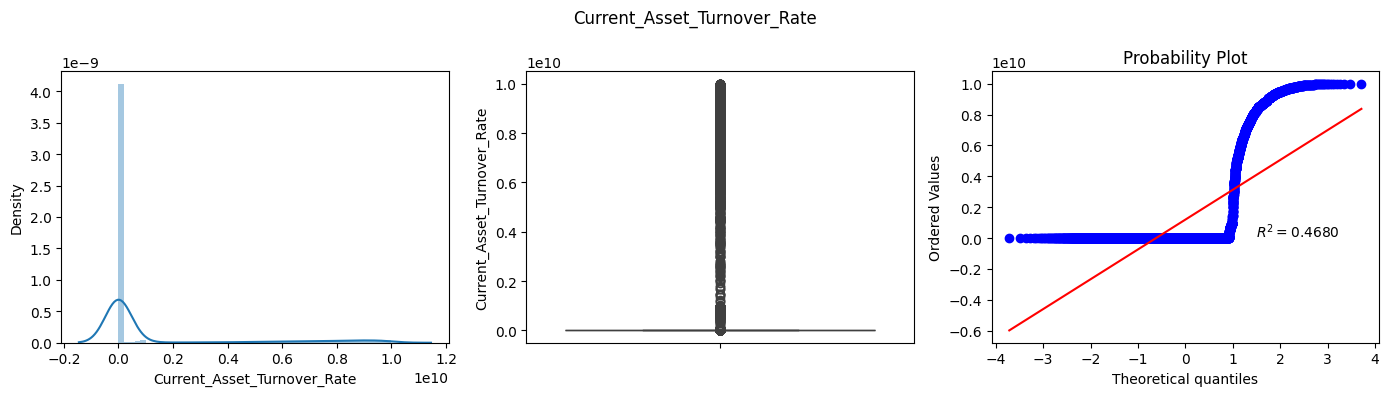

Skewness of Current_Asset_Turnover_Rate is : 2.1159556384021165
Kurtosis of Current_Asset_Turnover_Rate is : 2.793509248587132


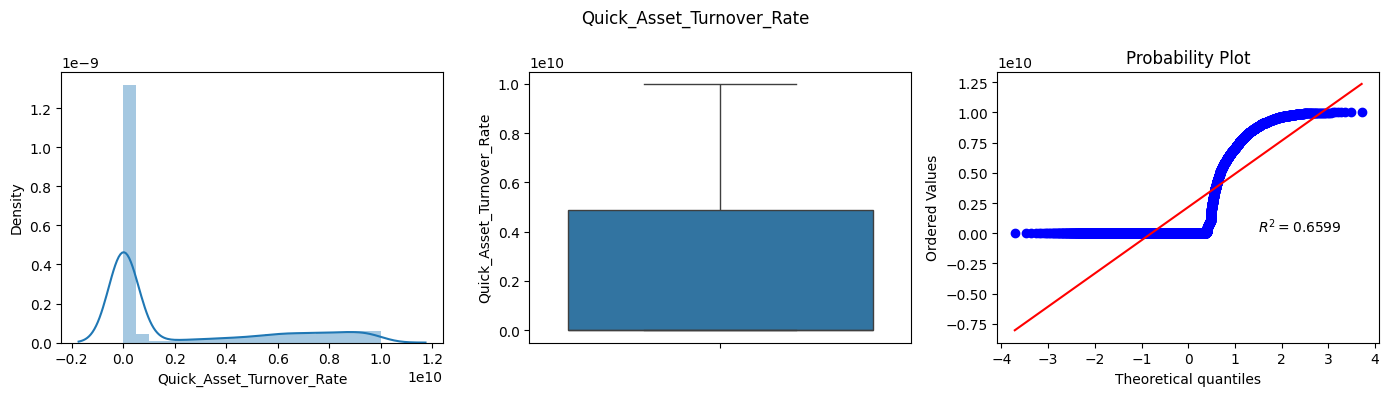

Skewness of Quick_Asset_Turnover_Rate is : 1.1373534593747237
Kurtosis of Quick_Asset_Turnover_Rate is : -0.3938953699684804


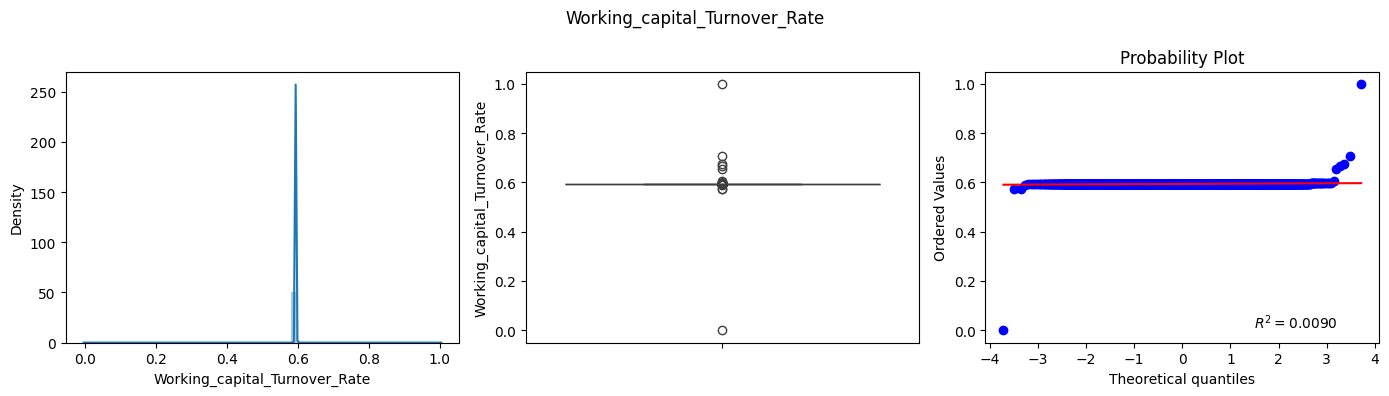

Skewness of Working_capital_Turnover_Rate is : -28.584610631201404
Kurtosis of Working_capital_Turnover_Rate is : 3458.06471106498


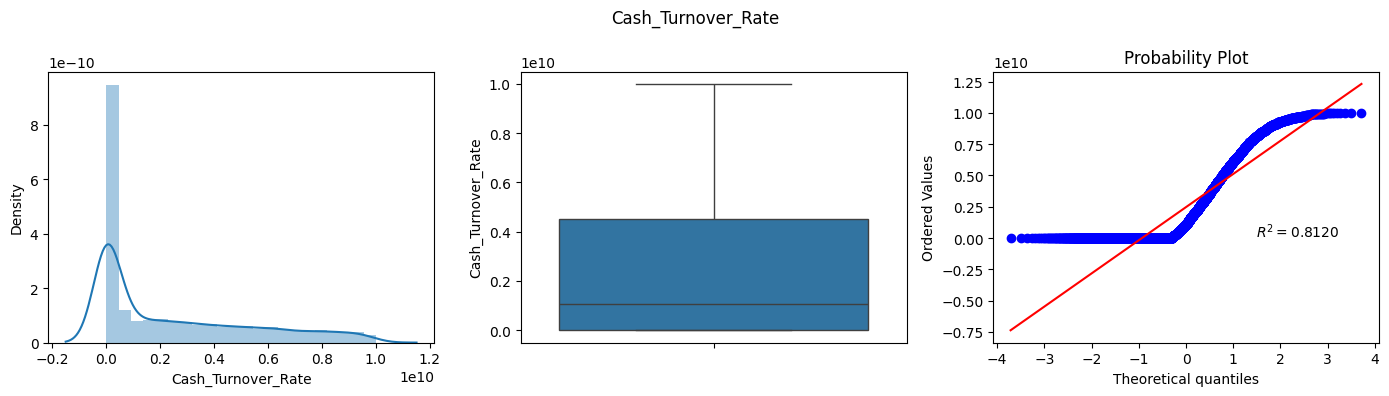

Skewness of Cash_Turnover_Rate is : 0.9541170558810121
Kurtosis of Cash_Turnover_Rate is : -0.3690317366310434


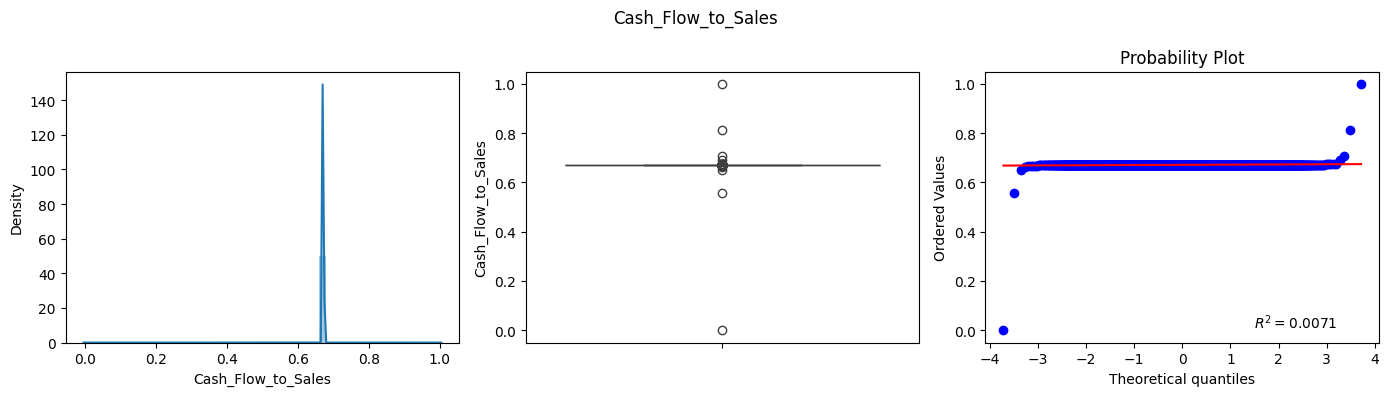

Skewness of Cash_Flow_to_Sales is : -47.86911211654488
Kurtosis of Cash_Flow_to_Sales is : 4153.563290206698


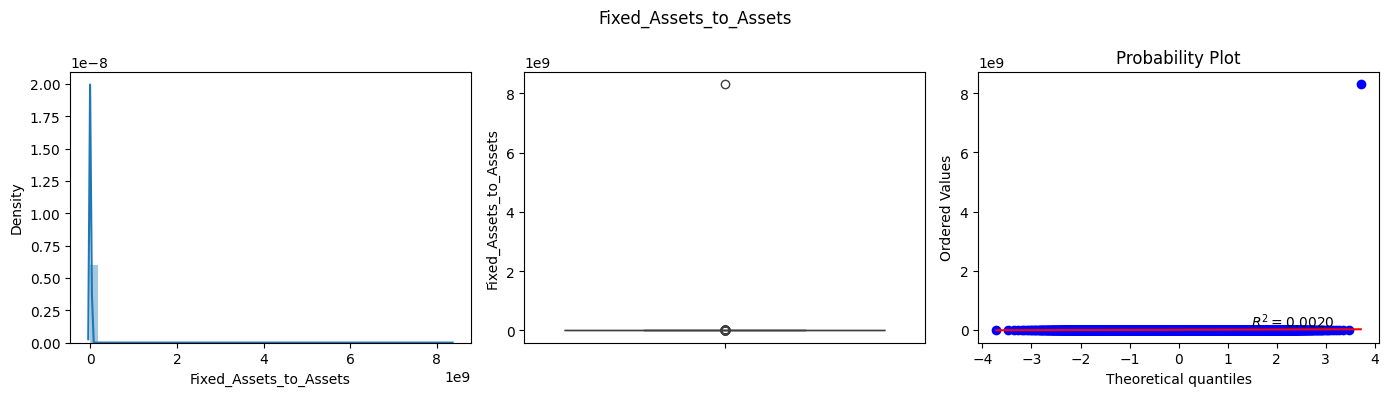

Skewness of Fixed_Assets_to_Assets is : 82.57723657279898
Kurtosis of Fixed_Assets_to_Assets is : 6819.000000000002


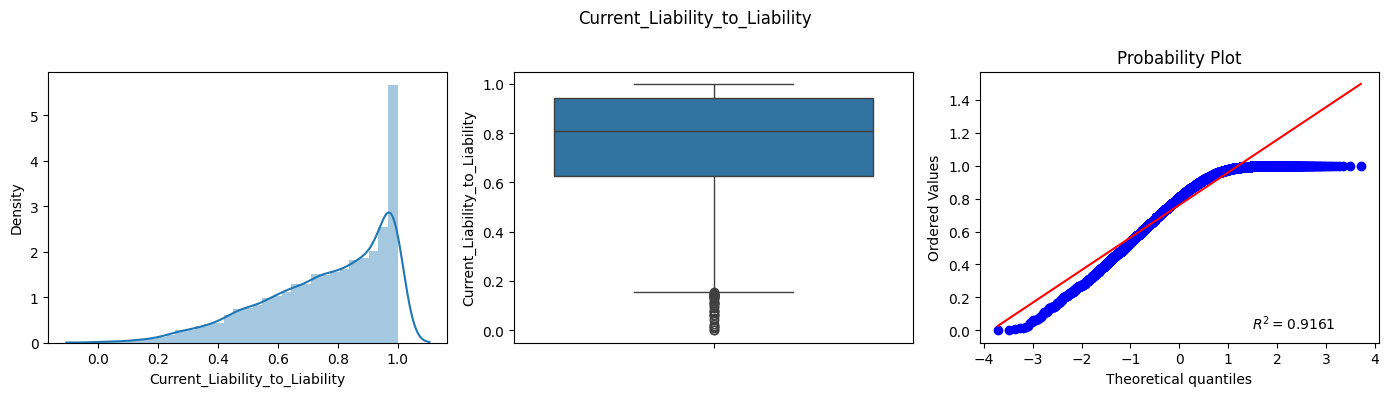

Skewness of Current_Liability_to_Liability is : -0.8350469004780781
Kurtosis of Current_Liability_to_Liability is : -0.0016292559796537986


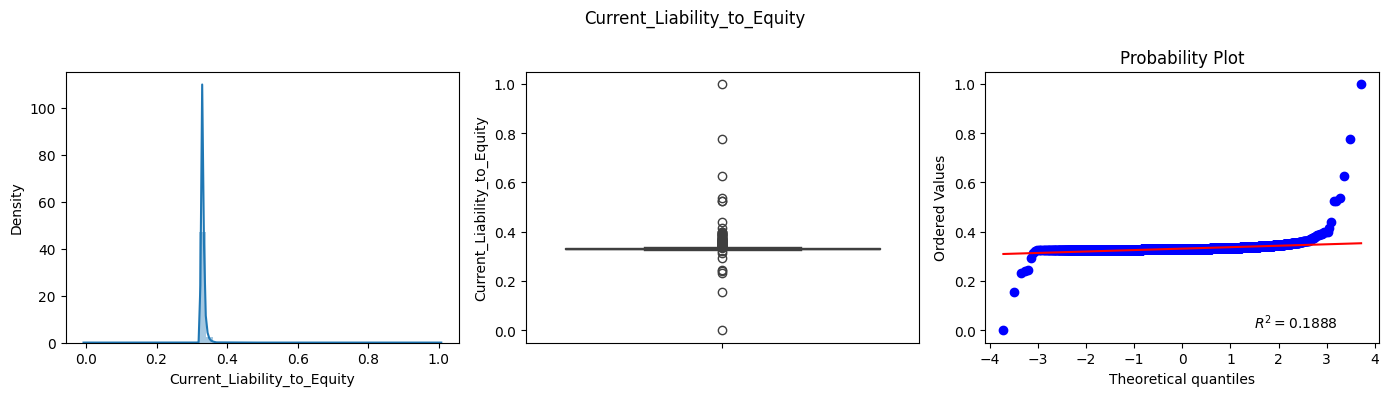

Skewness of Current_Liability_to_Equity is : 23.799164734548174
Kurtosis of Current_Liability_to_Equity is : 1171.460092252544


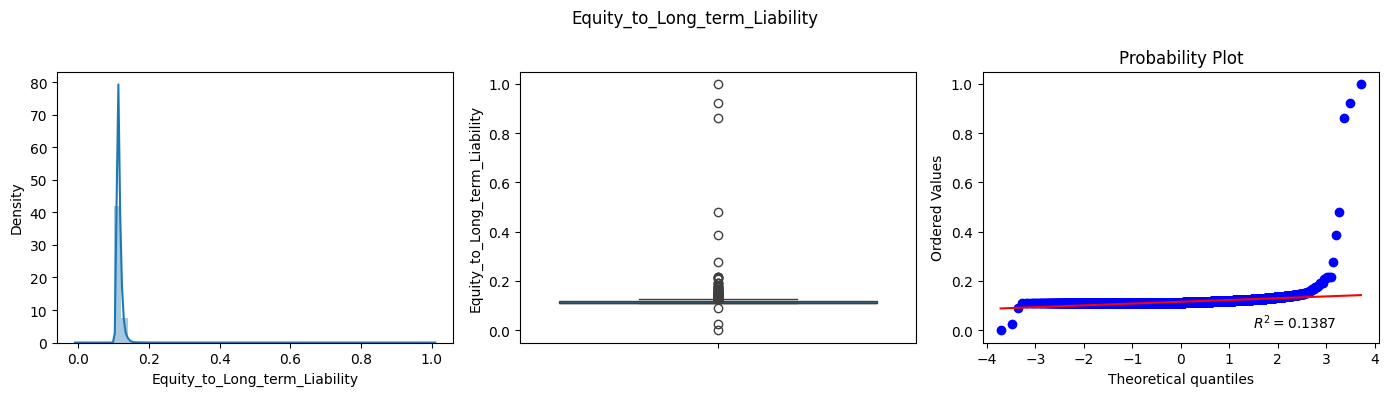

Skewness of Equity_to_Long_term_Liability is : 33.78993963057107
Kurtosis of Equity_to_Long_term_Liability is : 1381.155518332476


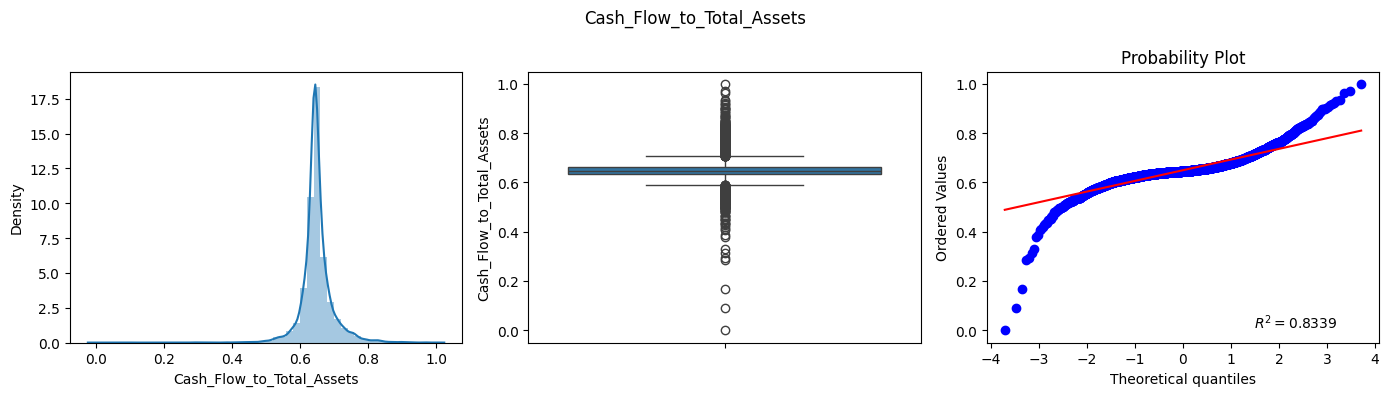

Skewness of Cash_Flow_to_Total_Assets is : -0.22815767309072998
Kurtosis of Cash_Flow_to_Total_Assets is : 16.56110253835962


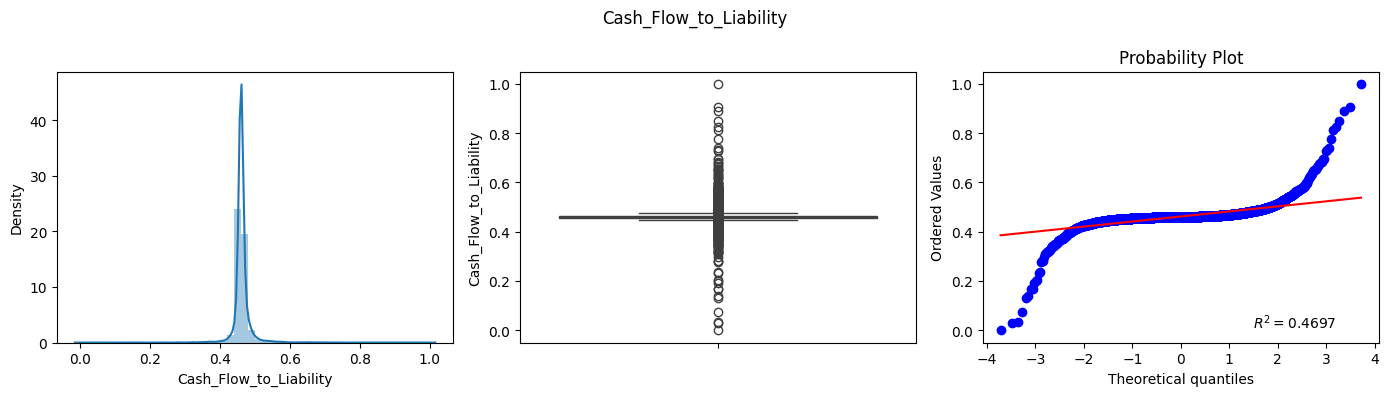

Skewness of Cash_Flow_to_Liability is : 1.0079627367748654
Kurtosis of Cash_Flow_to_Liability is : 84.85388453759073


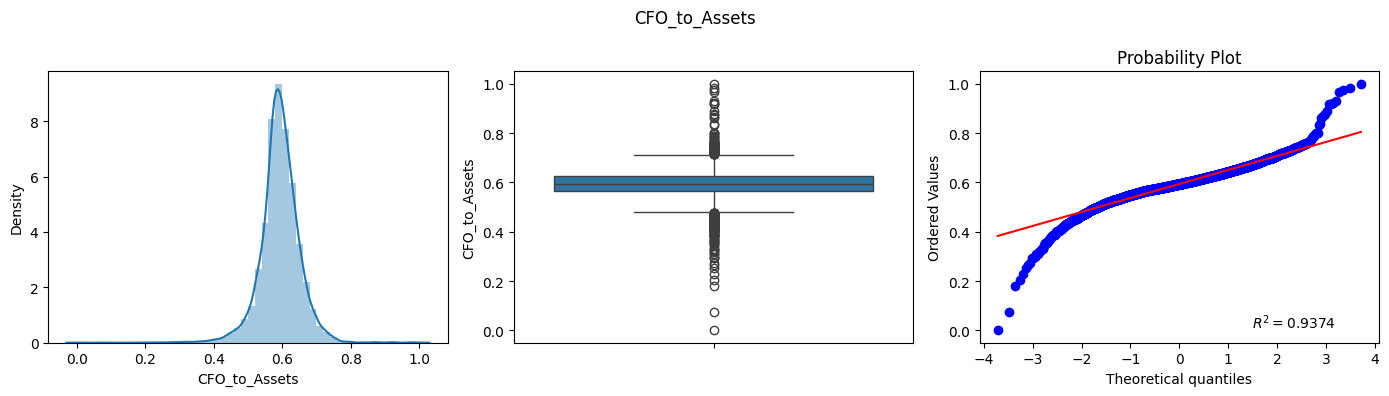

Skewness of CFO_to_Assets is : -0.4437624611401986
Kurtosis of CFO_to_Assets is : 7.047984672693275


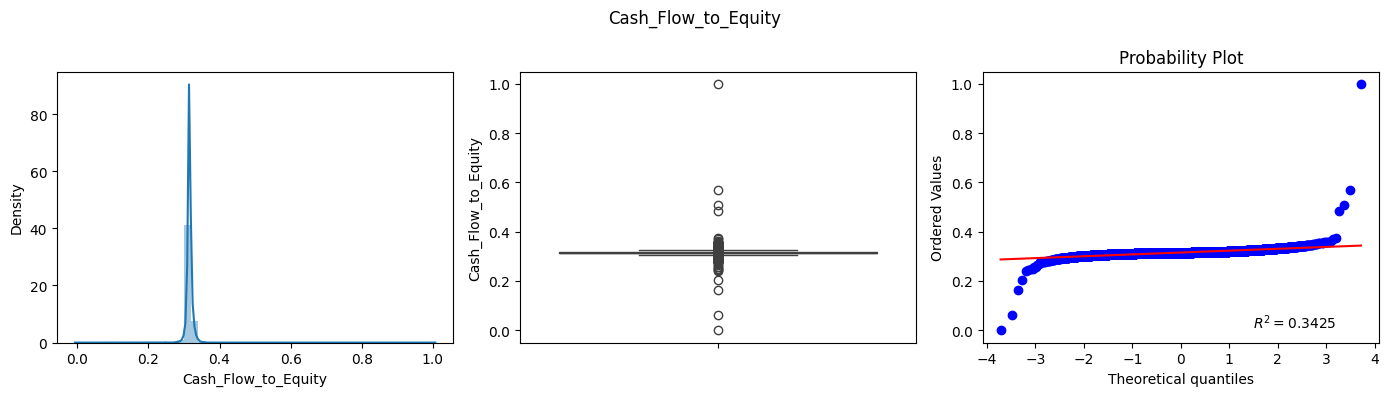

Skewness of Cash_Flow_to_Equity is : 19.943488151697377
Kurtosis of Cash_Flow_to_Equity is : 1249.738761923984


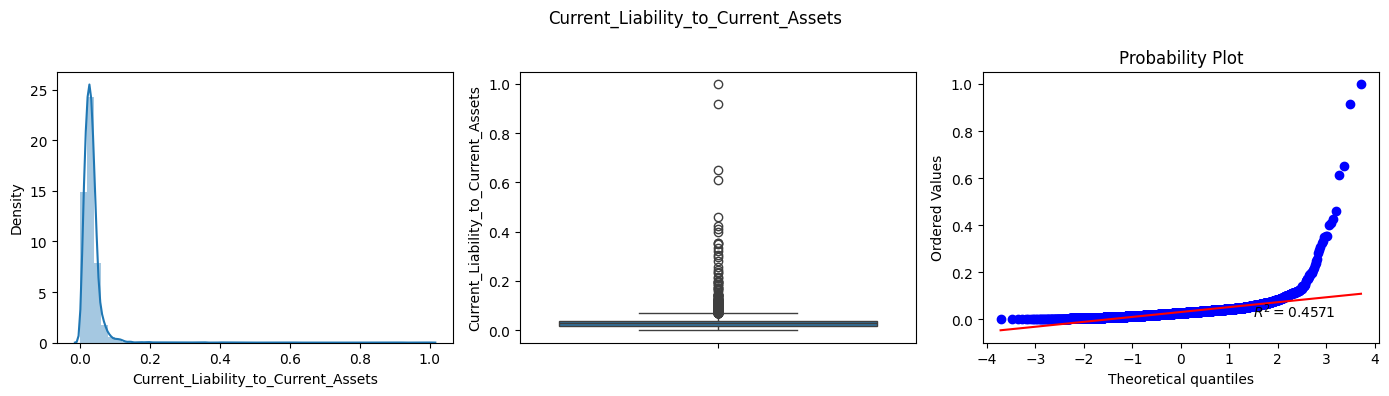

Skewness of Current_Liability_to_Current_Assets is : 13.188660546091514
Kurtosis of Current_Liability_to_Current_Assets is : 310.9992345859699


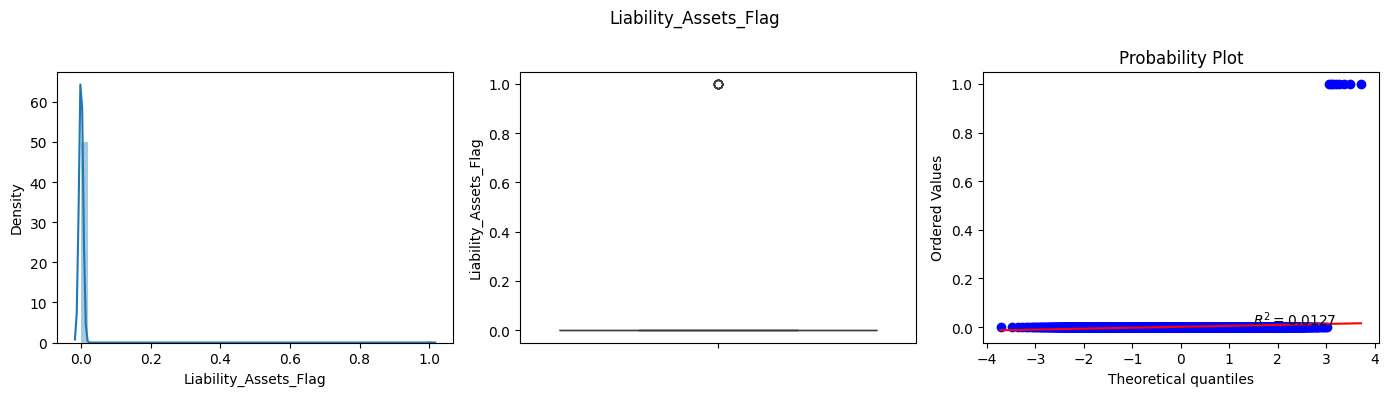

Skewness of Liability_Assets_Flag is : 29.15047171886589
Kurtosis of Liability_Assets_Flag is : 847.9987178016446


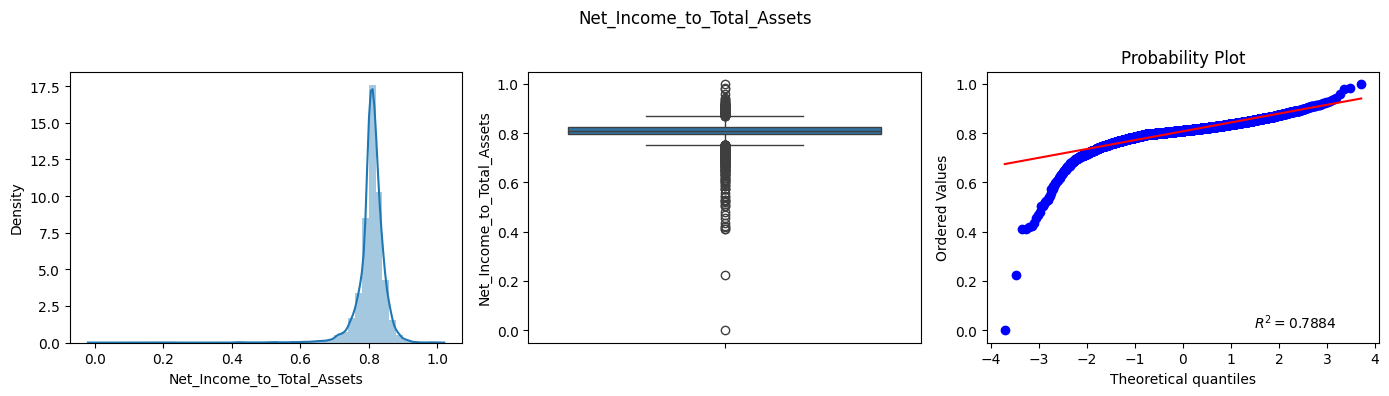

Skewness of Net_Income_to_Total_Assets is : -3.6840967759613386
Kurtosis of Net_Income_to_Total_Assets is : 43.73442461558547


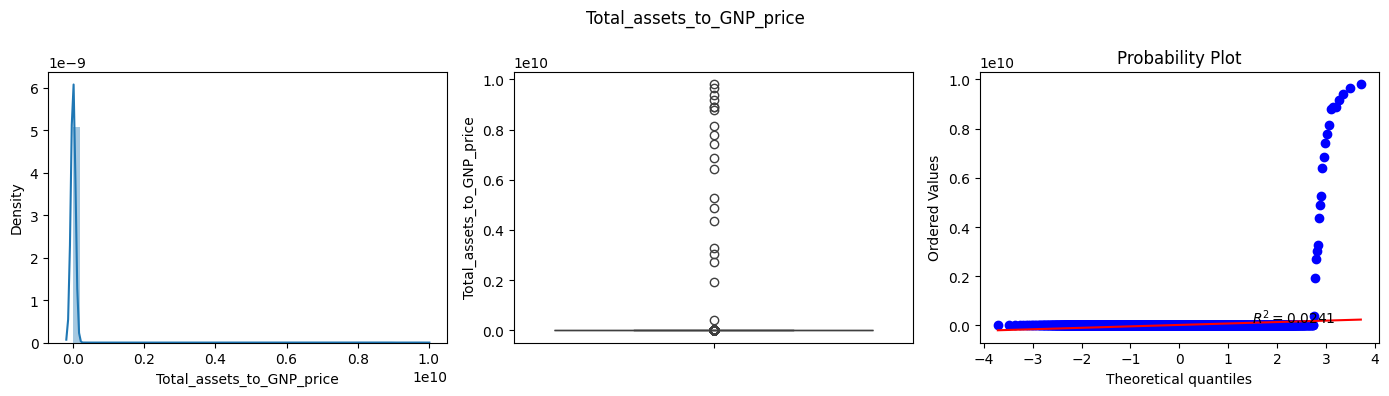

Skewness of Total_assets_to_GNP_price is : 21.75898297422601
Kurtosis of Total_assets_to_GNP_price is : 491.14324462558903


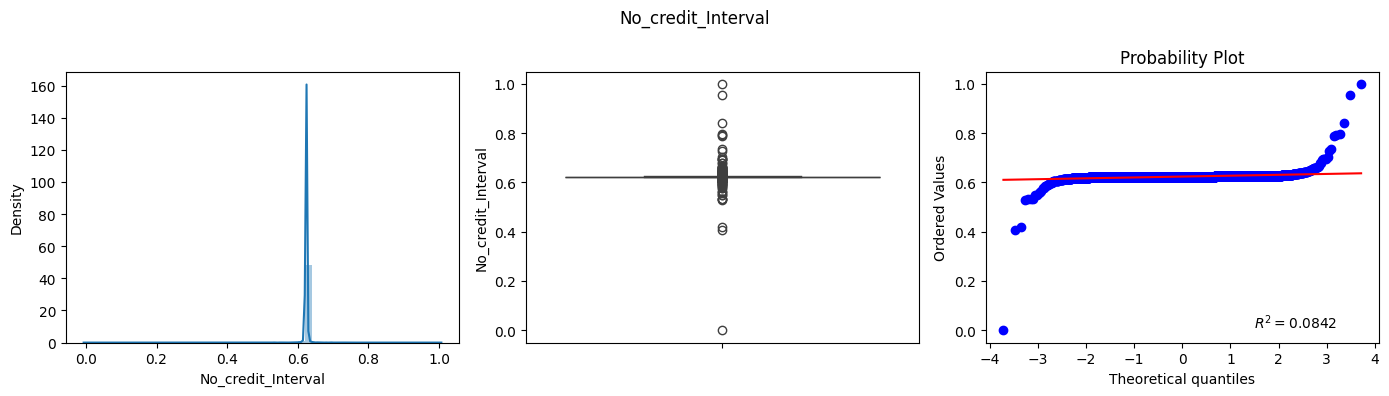

Skewness of No_credit_Interval is : -11.585565139631989
Kurtosis of No_credit_Interval is : 1240.5333884003533


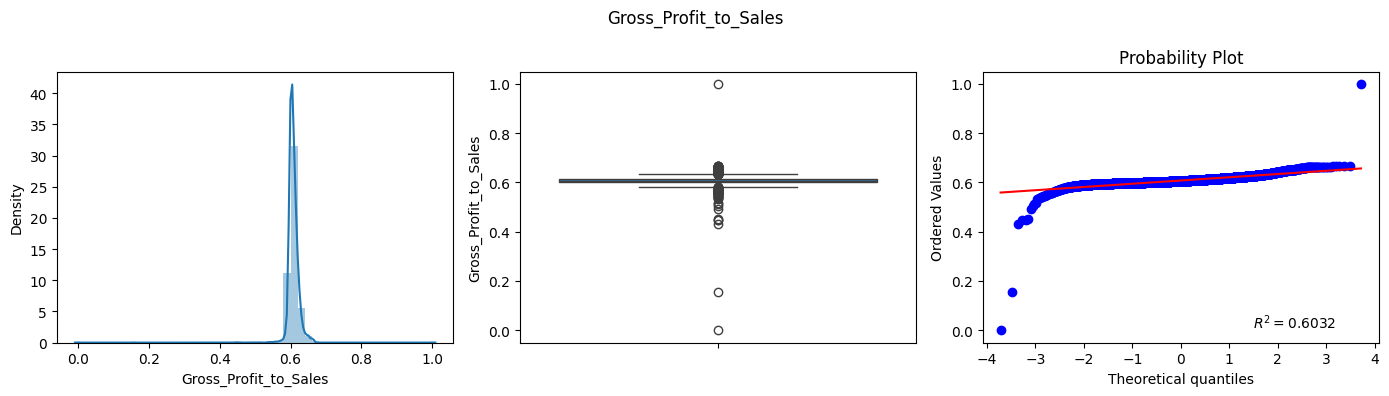

Skewness of Gross_Profit_to_Sales is : -8.043224607444369
Kurtosis of Gross_Profit_to_Sales is : 365.53710487381466


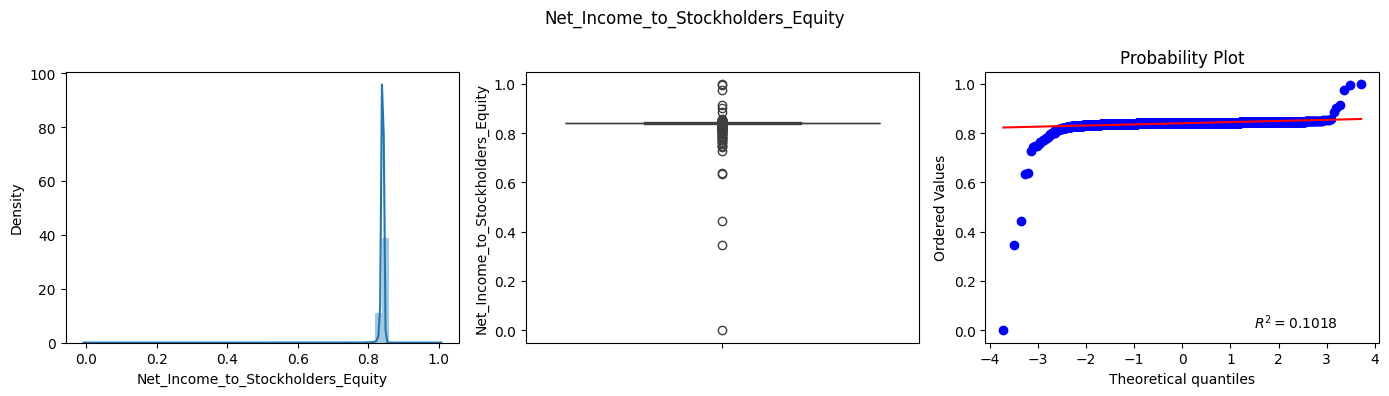

Skewness of Net_Income_to_Stockholders_Equity is : -37.96470114027043
Kurtosis of Net_Income_to_Stockholders_Equity is : 1944.7091685726564


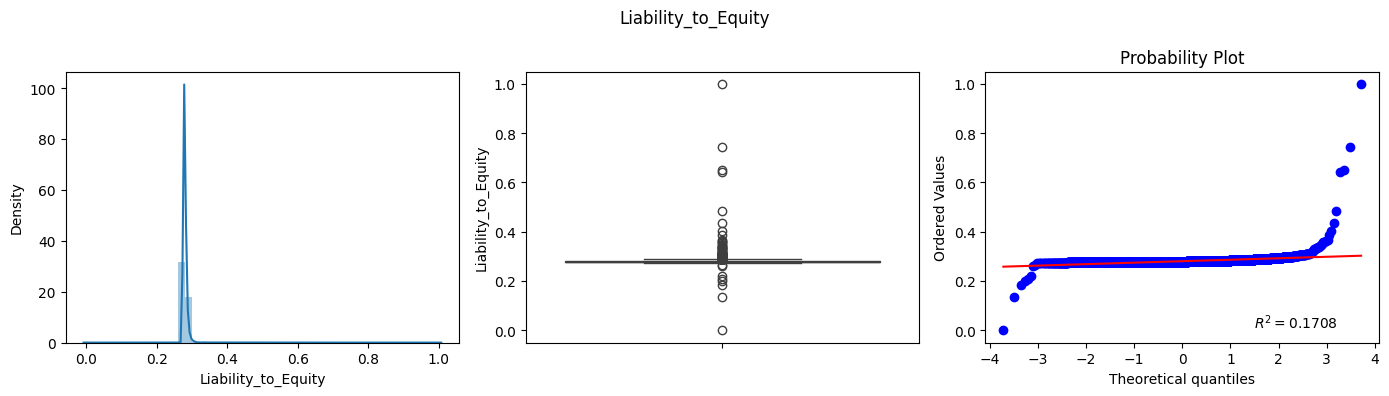

Skewness of Liability_to_Equity is : 27.4594671425143
Kurtosis of Liability_to_Equity is : 1209.2034913763239


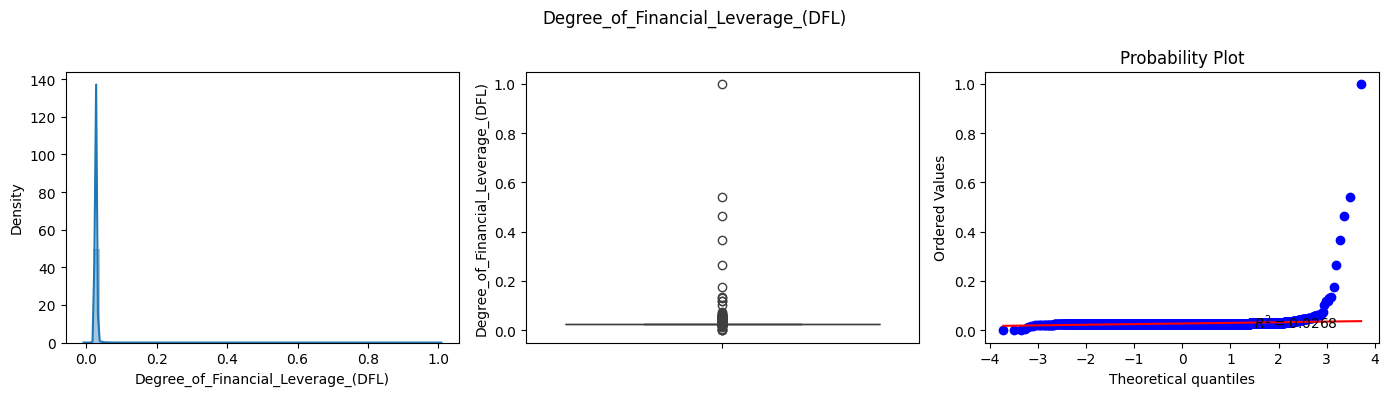

Skewness of Degree_of_Financial_Leverage_(DFL) is : 45.724197115582406
Kurtosis of Degree_of_Financial_Leverage_(DFL) is : 2475.43340394474


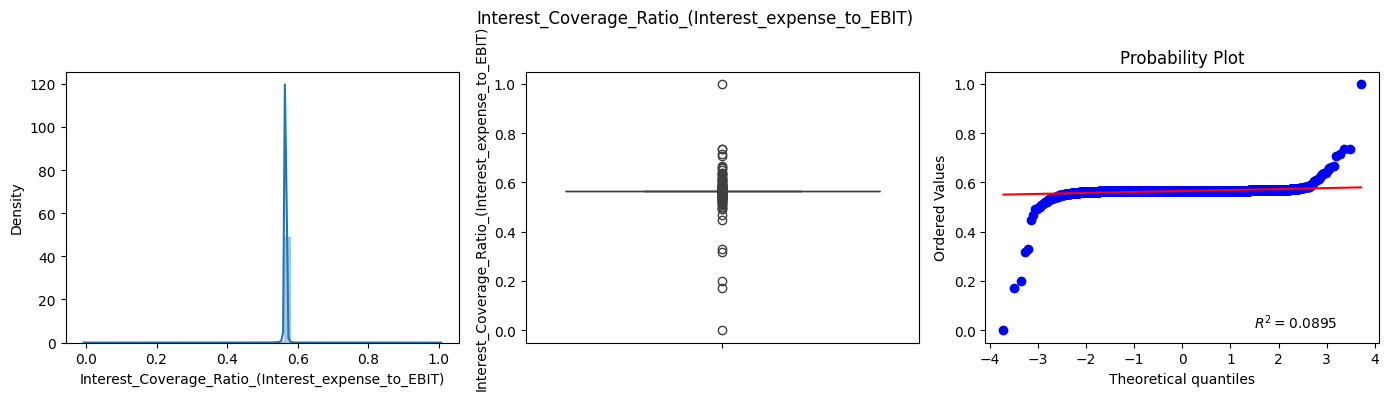

Skewness of Interest_Coverage_Ratio_(Interest_expense_to_EBIT) is : -13.939527900794817
Kurtosis of Interest_Coverage_Ratio_(Interest_expense_to_EBIT) is : 911.80090462008


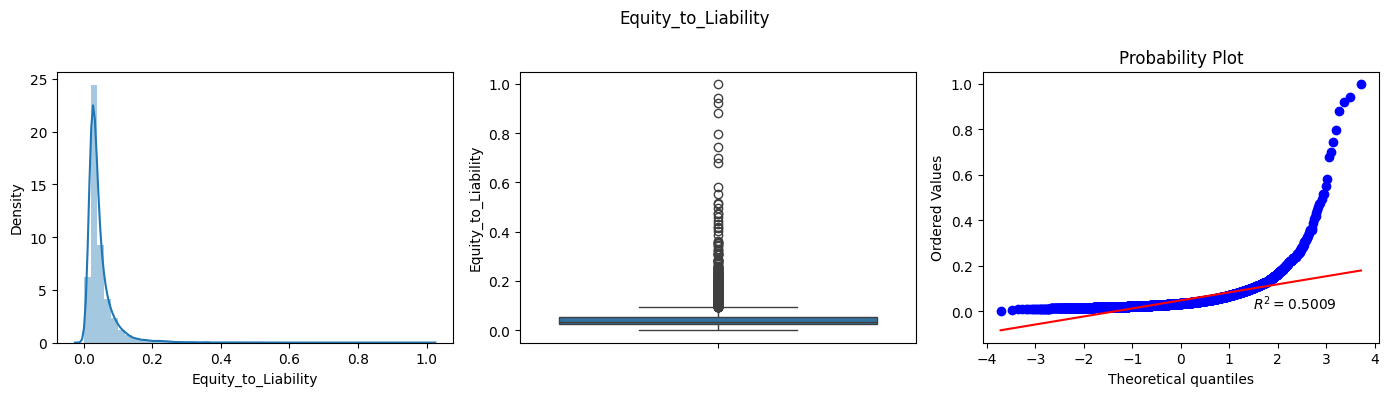

Skewness of Equity_to_Liability is : 7.401100836024543
Kurtosis of Equity_to_Liability is : 94.0661701812127


In [18]:
from scipy.stats import probplot
import gc
for col in data.drop('Bankrupt',axis=1).columns :

    plt.figure(figsize=(14,4))

    plt.subplot(1,3,1)
    sns.distplot(data[col])

    plt.subplot(1,3,2)
    sns.boxplot(data[col])

    plt.subplot(1,3,3)
    probplot(data[col],rvalue=True,plot=plt,dist='norm')

    plt.suptitle(col)
    plt.tight_layout()
    plt.show()

    print(f"Skewness of {col} is :",data[col].skew())
    print(f"Kurtosis of {col} is :",data[col].kurtosis())


In [19]:
data.Bankrupt.value_counts()

Bankrupt
0    6599
1     220
Name: count, dtype: int64

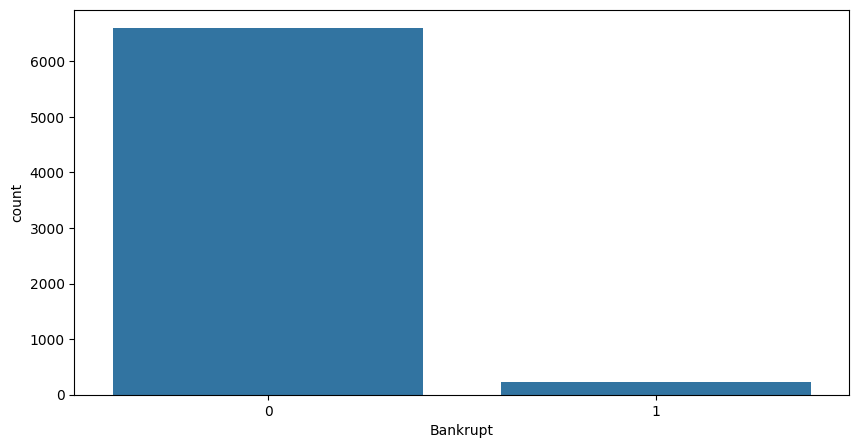

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data,x='Bankrupt')
plt.show()

The given data is highly imbalanced with only less no. of companies getting bankrupted i.e, minority class (1) accumulating just 3.2% .The imbalanced data need to be balanced by sampling techniquies to improve the model efficiency.

Finding the Correlation Between X(Features) and y(bankrupt) variable

In [21]:
data.corr().iloc[:,0].head(50)

Bankrupt                                                   1.000000
ROA(C)_before_interest_and_depreciation_before_interest   -0.260807
ROA(A)_before_interest_and_%_after_tax                    -0.282941
ROA(B)_before_interest_and_depreciation_after_tax         -0.273051
Operating_Gross_Margin                                    -0.100043
Realized_Sales_Gross_Margin                               -0.099445
Operating_Profit_Rate                                     -0.000230
Pre_tax_net_Interest_Rate                                 -0.008517
After_tax_net_Interest_Rate                               -0.008857
Non_industry_income_and_expenditure/revenue               -0.016593
Continuous_interest_rate_(after_tax)                      -0.008395
Operating_Expense_Rate                                    -0.006083
Research_and_development_expense_rate                     -0.024232
Cash_flow_rate                                            -0.072356
Interest_bearing_debt_interest_rate             

In [22]:
data.corr().iloc[:,0].tail(45)

Net_Worth_Turnover_Rate_(times)                       0.021089
Revenue_per_person                                    0.039718
Operating_profit_per_person                          -0.092842
Allocation_rate_per_person                            0.002829
Working_Capital_to_Total_Assets                      -0.193083
Quick_Assets/Total_Assets                            -0.086382
Current_Assets/Total_Assets                          -0.044823
Cash/Total_Assets                                    -0.100130
Quick_Assets/Current_Liability                       -0.003823
Cash/Current_Liability                                0.077921
Current_Liability_to_Assets                           0.194494
Operating_Funds_to_Liability                         -0.077082
Inventory/Working_Capital                            -0.001906
Inventory/Current_Liability                           0.000822
Current_Liabilities/Liability                        -0.020809
Working_Capital/Equity                               -0

In [23]:
#Outlier Detection using Isolation Forest

In [24]:
import numpy as np
import statistics as stats
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest instance
clf = IsolationForest(contamination=0.1)  # contamination is the expected proportion of outliers

# Fit the model and predict outliers
clf.fit(data)
outliers = clf.predict(data)

# Outliers are labeled as -1, inliers are labeled as 1
stats.Counter(outliers==-1)

#The True count here represent the no. of Outliers present in dataSet when contamination=10%

Counter({True: 682, False: 6137})

In [25]:
# data["Anomaly"]=outliers

In [26]:
data.head(50)

Bankrupt  ROA(C)_before_interest_and_depreciation_before_interest  \
0          1                                           0.370594         
1          1                                           0.464291         
2          1                                           0.426071         
3          1                                           0.399844         
4          1                                           0.465022         
5          1                                           0.388680         
6          0                                           0.390923         
7          0                                           0.508361         
8          0                                           0.488519         
9          0                                           0.495686         
10         0                                           0.482475         
11         0                                           0.444401         
12         0                                           0.491152         
13         0                                           0.474041         
14         0                                           0.506703         
15         0                                           0.513821         
16         0                                           0.488909         
17         0                                           0.535953         
18         0                                           0.504071         
19         0                                           0.487398         
20         0                                           0.485253         
21         0                                           0.504558         
22         0                                           0.512017         
23         0                                           0.494857         
24         0                                           0.509969         
25         0                                           0.444986         
26         0                                           0.519280         
27         0                                           0.547409         
28         0                                           0.500853         
29         1                                           0.416126         
30         1                                           0.462195         
31         0                                           0.476088         
32         0                                           0.505874         
33         0                                           0.486374         
34         0                                           0.494369         
35         0                                           0.475162         
36         0                                           0.462926         
37         0                                           0.478916         
38         0                                           0.481061         
39         0                                           0.486228         
40         0                                           0.507824         
41         0                                           0.489153         
42         0                                           0.511188         
43         0                                           0.523034         
44         0                                           0.508848         
45         0                                           0.488958         
46         0                                           0.502121         
47         0                                           0.523083         
48         0                                           0.493346         
49         0                                           0.505631         

    ROA(A)_before_interest_and_%_after_tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   
5   

In [27]:
#Action on outliers

# **Feature Engineering**



In [28]:
X=data.drop("Bankrupt",axis=1)
y=data["Bankrupt"]

In [29]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt, Length: 6819, dtype: int64

In [30]:
X.shape

(6819, 94)

In [31]:
 !pip install feature-engine

  Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [36]:
# Install compatible versions
!pip install scikit-learn==1.0.2
!pip install imbalanced-learn==0.8.1

  Using cached scikit_learn-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.11.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
feature-engine 1.8.0 requires scikit-learn>=1.4.0, but you have scikit-learn 1.0.2 which is incompatible.


In [37]:
from sklearn.pipeline import Pipeline
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, DropDuplicateFeatures

In [38]:
pipeline = Pipeline(steps=[("constant",DropConstantFeatures()),
                  ("correlated",DropCorrelatedFeatures()),("duplicate",DropDuplicateFeatures())])
# threshold: float=0.8,
X = pipeline.fit_transform(X)

In [39]:
X.shape

(6819, 69)

In [40]:
X.columns

Index(['After_tax_net_Interest_Rate',
       'Non_industry_income_and_expenditure/revenue', 'Operating_Expense_Rate',
       'Research_and_development_expense_rate', 'Cash_flow_rate',
       'Interest_bearing_debt_interest_rate', 'Tax_rate_(A)',
       'Net_Value_Per_Share_(A)', 'Cash_Flow_Per_Share',
       'Revenue_Per_Share_(Yuan_¥)', 'Realized_Sales_Gross_Profit_Growth_Rate',
       'Operating_Profit_Growth_Rate', 'After_tax_Net_Profit_Growth_Rate',
       'Continuous_Net_Profit_Growth_Rate', 'Total_Asset_Growth_Rate',
       'Net_Value_Growth_Rate', 'Total_Asset_Return_Growth_Rate_Ratio',
       'Cash_Reinvestment_%', 'Current_Ratio', 'Quick_Ratio',
       'Interest_Expense_Ratio', 'Total_debt/Total_net_worth',
       'Long_term_fund_suitability_ratio_(A)', 'Borrowing_dependency',
       'Contingent_liabilities/Net_worth',
       'Net_profit_before_tax/Paid_in_capital',
       'Inventory_and_accounts_receivable/Net_value', 'Total_Asset_Turnover',
       'Accounts_Receivable_Turnov

In [41]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt, Length: 6819, dtype: int64

In [42]:
# Perform oversampling using SMOTE
from imblearn.over_sampling import SMOTE

oversampling = SMOTE()
X1, y1= oversampling.fit_resample(X, y)


In [43]:
print("Before Sampling",X.shape)
print("After Sampling",X1.shape)


Before Sampling (6819, 69)
After Sampling (13198, 69)


In [44]:
print("Count of 0 =",np.sum(y1==0))
print("Count of 1 =",np.sum(y1==1))

Count of 0 = 6599
Count of 1 = 6599


<Axes: xlabel='Bankrupt', ylabel='count'>

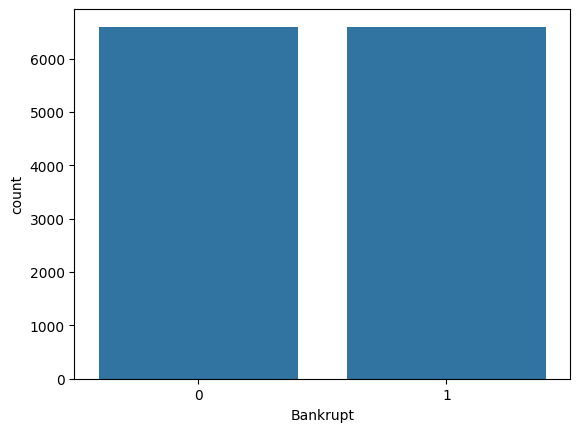

In [45]:
sns.countplot(x=y1)

##Model Building

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [48]:
X_train.shape

(9238, 69)

In [49]:
X_test.shape

(3960, 69)

In [50]:
# !pip install xgboost


In [51]:
# Model Building---with all possible Algorithms

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier


In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Dictionary of models
models = {
    "logistic regression": LogisticRegression(),
    "random forest": RandomForestClassifier(),
    "XGboostclassifier": XGBClassifier(),
    "gradient boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "k-NN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "LDA": LinearDiscriminantAnalysis(),
    "MLP": MLPClassifier()
}
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")


Model: logistic regression
Accuracy: 0.5975
Model: random forest
Accuracy: 0.9826
Model: XGboostclassifier
Accuracy: 0.9894
Model: gradient boosting
Accuracy: 0.9662
Model: AdaBoost
Accuracy: 0.9444
Model: Naive Bayes
Accuracy: 0.5023
Model: k-NN
Accuracy: 0.9119
Model: Decision Tree
Accuracy: 0.9573
Model: SVM
Accuracy: 0.8265
Model: LDA
Accuracy: 0.8889
Model: MLP
Accuracy: 0.8452


From the above models, dataset trained on different models/Algorithms.
 We have seen RandomForest and XGBoostClassifier are yielding High accuracy among other  algorithms.
 Concluding, We are good to go with either of them.

***Feature Selection***

SelectKBest

In [54]:
from sklearn.feature_selection import SelectKBest, RFE, chi2

In [55]:
k_best = SelectKBest(k=30, score_func=chi2)
k_best.fit(X1,y1)

SelectKBest(k=30, score_func=<function chi2 at 0x78b2c4485b40>)

In [56]:
k_best_features = k_best.get_feature_names_out()
k_best_features

array(['Operating_Expense_Rate', 'Research_and_development_expense_rate',
       'Interest_bearing_debt_interest_rate', 'Tax_rate_(A)',
       'Revenue_Per_Share_(Yuan_¥)', 'Total_Asset_Growth_Rate',
       'Net_Value_Growth_Rate', 'Current_Ratio', 'Quick_Ratio',
       'Total_debt/Total_net_worth', 'Accounts_Receivable_Turnover',
       'Average_Collection_Days', 'Inventory_Turnover_Rate_(times)',
       'Fixed_Assets_Turnover_Frequency', 'Revenue_per_person',
       'Allocation_rate_per_person', 'Quick_Assets/Total_Assets',
       'Cash/Total_Assets', 'Quick_Assets/Current_Liability',
       'Cash/Current_Liability', 'Current_Liability_to_Assets',
       'Inventory/Current_Liability',
       'Long_term_Liability_to_Current_Assets',
       'Current_Asset_Turnover_Rate', 'Quick_Asset_Turnover_Rate',
       'Cash_Turnover_Rate', 'Fixed_Assets_to_Assets',
       'Current_Liability_to_Current_Assets', 'Total_assets_to_GNP_price',
       'Equity_to_Liability'], dtype=object)

In [57]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=35,step=5,verbose=0)
rfe.fit(X1,y1)

RFE(estimator=RandomForestClassifier(), n_features_to_select=35, step=5)

In [58]:
rfe.get_feature_names_out()

array(['After_tax_net_Interest_Rate',
       'Non_industry_income_and_expenditure/revenue',
       'Research_and_development_expense_rate', 'Cash_flow_rate',
       'Interest_bearing_debt_interest_rate', 'Net_Value_Per_Share_(A)',
       'Total_Asset_Growth_Rate', 'Net_Value_Growth_Rate', 'Quick_Ratio',
       'Interest_Expense_Ratio', 'Total_debt/Total_net_worth',
       'Borrowing_dependency', 'Contingent_liabilities/Net_worth',
       'Net_profit_before_tax/Paid_in_capital', 'Average_Collection_Days',
       'Fixed_Assets_Turnover_Frequency', 'Revenue_per_person',
       'Operating_profit_per_person', 'Allocation_rate_per_person',
       'Cash/Total_Assets', 'Quick_Assets/Current_Liability',
       'Current_Liability_to_Assets', 'Inventory/Working_Capital',
       'Long_term_Liability_to_Current_Assets',
       'Retained_Earnings_to_Total_Assets', 'Total_income/Total_expense',
       'Total_expense/Assets', 'Current_Asset_Turnover_Rate',
       'Quick_Asset_Turnover_Rate', 'Cash_Tur

# Feature Selection:

In [59]:
# Rfe features top 12

In [60]:
X_new = X1[['After_tax_net_Interest_Rate',
       'Non_industry_income_and_expenditure/revenue', 'Cash_flow_rate',
       'Interest_bearing_debt_interest_rate', 'Net_Value_Per_Share_(A)',
       'Total_Asset_Growth_Rate', 'Net_Value_Growth_Rate', 'Quick_Ratio',
       'Interest_Expense_Ratio', 'Total_debt/Total_net_worth',
       'Borrowing_dependency', 'Contingent_liabilities/Net_worth',]]



In [61]:
X_new.shape

(13198, 12)

In [62]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y1, test_size=0.3, random_state=42)

In [63]:
model2 = XGBClassifier()
model2.fit(X_train2,y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [64]:
y_pred2 = model2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
accuracy2*100

97.57575757575758

#SelectKBest Features--top10

In [65]:
X_new2 = X1[['Operating_Expense_Rate', 'Research_and_development_expense_rate',
       'Interest_bearing_debt_interest_rate', 'Tax_rate_(A)',
       'Revenue_Per_Share_(Yuan_¥)', 'Total_Asset_Growth_Rate',
       'Net_Value_Growth_Rate', 'Current_Ratio', 'Quick_Ratio',
       'Total_debt/Total_net_worth']]

In [66]:
X_new2.shape

(13198, 10)

Model Building by considering only Top 10 features

In [67]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_new2, y1, test_size=0.3, random_state=42)

In [68]:
model3 = XGBClassifier()
model3.fit(X_train3,y_train3)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
y_pred3 = model3.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred3)
score = accuracy3*100
print(f" Accuracy is {round(score,2)} %")

 Accuracy is 97.02 %


In [70]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test3,y_pred3)
print (confusion_matrix)

[[1903  102]
 [  16 1939]]


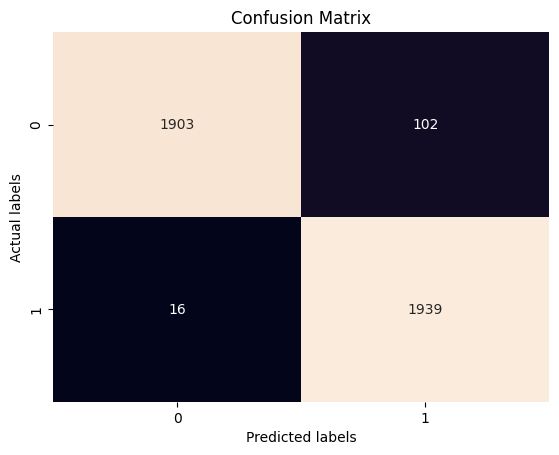

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(confusion_matrix,annot=True,  fmt='g', ax=ax, cbar = False);
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Actual labels');
ax.set_title('Confusion Matrix');

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test3,y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2005
           1       0.95      0.99      0.97      1955

    accuracy                           0.97      3960
   macro avg       0.97      0.97      0.97      3960
weighted avg       0.97      0.97      0.97      3960



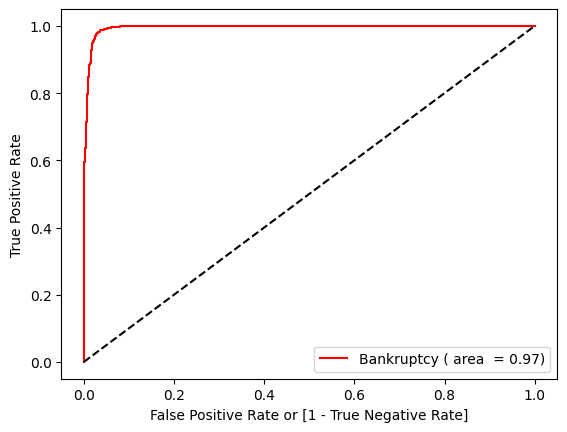

In [73]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

prob = model3.predict_proba(X_test3)[:,1]

fpr, tpr, thresholds = roc_curve(y_test3,prob )

auc = roc_auc_score(y_test3, y_pred3)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='Bankruptcy ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [74]:
#Deployment
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.2 MB/s eta 0:00:00


In [77]:
# save the model to disk
import pickle
filename = 'Bankruptcy2.sav'
pickle.dump(model3, open(filename, 'wb'))